In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

import warnings
warnings.filterwarnings('ignore')

In [59]:
# Setting Pandas options for better display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [60]:
telecom = pd.read_csv('telecom_churn_data.csv', header=0, sep=',')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [61]:
telecom.shape

(99999, 226)

In [62]:
# Checking for duplicates
len(telecom[telecom.duplicated()].index)

# There's none

0

### Lets first keep only the high value customers as mentioned in the problem statement

In [63]:
# Lets fill the missing values in the average data recharge columns as missing values mean the customer didn't recharge
telecom['av_rech_amt_data_6'] = telecom['av_rech_amt_data_6'].fillna(0)
telecom['av_rech_amt_data_7'] = telecom['av_rech_amt_data_7'].fillna(0)
telecom['av_rech_amt_data_8'] = telecom['av_rech_amt_data_8'].fillna(0)

In [64]:
# Lets fill the missing values in the total data recharge columns as missing values mean the customer didn't recharge
telecom['total_rech_data_6'] = telecom['total_rech_data_6'].fillna(0)
telecom['total_rech_data_7'] = telecom['total_rech_data_7'].fillna(0)
telecom['total_rech_data_8'] = telecom['total_rech_data_8'].fillna(0)

In [65]:
# Now lets derive total data recharge amount
telecom['total_rech_amt_data_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_amt_data_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_rech_amt_data_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']

In [66]:
# Lets filter the high value customers according to the problem statement
avg_rech_happy_phase_inc_data = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] 
                            + telecom['total_rech_amt_data_6']+ telecom['total_rech_amt_data_7'])/2

recharge_threshold = np.percentile(avg_rech_happy_phase_inc_data, 70)

telecom_high_val = telecom[avg_rech_happy_phase_inc_data >= recharge_threshold]
telecom_high_val.shape

(30001, 229)

#### We have considered minutes recharge as well as data recharge for calculating the high value customers

In [67]:
# Lets make sure the columns related to Churn do not have any missing values
print(telecom_high_val['total_ic_mou_9'].isnull().any())
print(telecom_high_val['total_og_mou_9'].isnull().any())
print(telecom_high_val['vol_3g_mb_9'].isnull().any())
print(telecom_high_val['vol_2g_mb_9'].isnull().any())

False
False
False
False


In [68]:
# There is no missing values. Lets now mark churn (1) vs non-churn(0)
telecom_high_val['usage'] = telecom_high_val['total_ic_mou_9'] + telecom_high_val['total_og_mou_9']
+ telecom_high_val['vol_2g_mb_9'] + telecom_high_val['vol_3g_mb_9']

telecom_high_val['churn'] = telecom_high_val['usage'].apply(lambda x: 1 if x==0 else 0)

In [69]:
# Lets drop 'usage' and all columns for the month of September
telecom_high_val = telecom_high_val.drop(columns=['usage'])
telecom_high_val = telecom_high_val.drop(columns=list(telecom_high_val.filter(like='9')))
telecom_high_val = telecom_high_val.drop(columns=['sep_vbc_3g'])
telecom_high_val.shape

(30001, 175)

In [70]:
# Lets calculate Churn percentage
round(telecom_high_val['churn'].astype('category').value_counts()/len(telecom_high_val.index),2)

0    0.91
1    0.09
Name: churn, dtype: float64

In [71]:
# Lets collect garbage
gc.collect()

180

### We have too many columns with missing attributes. Lets first determine the attributes that are not important and drop them

In [72]:
# lets now drop av_rech_amt_data_* and total_rech_data_* columns as we have derived new columns out of them
cols = list(telecom_high_val.filter(regex='av_rech_amt_data')) + list(telecom_high_val.filter(regex='total_rech_data'))
telecom_high_val = telecom_high_val.drop(columns=cols)
telecom_high_val.shape

(30001, 169)

In [73]:
# Now lets check the degree of uniqueness in each column
for col in telecom_high_val.columns:
    print('{} {}'.format(col, telecom_high_val[col].nunique()))

mobile_number 30001
circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
last_date_of_month_6 1
last_date_of_month_7 1
last_date_of_month_8 1
arpu_6 29072
arpu_7 29084
arpu_8 28073
onnet_mou_6 16890
onnet_mou_7 16987
onnet_mou_8 15872
offnet_mou_6 21220
offnet_mou_7 21263
offnet_mou_8 20163
roam_ic_mou_6 4048
roam_ic_mou_7 3385
roam_ic_mou_8 3433
roam_og_mou_6 4744
roam_og_mou_7 3994
roam_og_mou_8 4001
loc_og_t2t_mou_6 10420
loc_og_t2t_mou_7 10394
loc_og_t2t_mou_8 10063
loc_og_t2m_mou_6 15625
loc_og_t2m_mou_7 15674
loc_og_t2m_mou_8 15130
loc_og_t2f_mou_6 3090
loc_og_t2f_mou_7 3100
loc_og_t2f_mou_8 2989
loc_og_t2c_mou_6 1682
loc_og_t2c_mou_7 1764
loc_og_t2c_mou_8 1723
loc_og_mou_6 18348
loc_og_mou_7 18502
loc_og_mou_8 17582
std_og_t2t_mou_6 11102
std_og_t2t_mou_7 11254
std_og_t2t_mou_8 10251
std_og_t2m_mou_6 12875
std_og_t2m_mou_7 12888
std_og_t2m_mou_8 11803
std_og_t2f_mou_6 1656
std_og_t2f_mou_7 1599
std_og_t2f_mou_8 1518
std_og_t2c_mou_6 1
std_og_t2c_mou_7 1
std_og_t2c_mou_

In [74]:
# drop columns that have only 1 unique value as they won't give much information
for col in telecom_high_val.columns:
    if telecom_high_val[col].nunique()==1:
        telecom_high_val = telecom_high_val.drop(columns=col)
telecom_high_val.shape

(30001, 156)

In [75]:
# mobile_number is unique, we may not need it as we can use the dataframe index for uniqueness
telecom_high_val = telecom_high_val.drop(columns=['mobile_number'])

In [76]:
# Lets check one more time
for col in telecom_high_val.columns:
    print('{} {}'.format(col, telecom_high_val[col].nunique()))

arpu_6 29072
arpu_7 29084
arpu_8 28073
onnet_mou_6 16890
onnet_mou_7 16987
onnet_mou_8 15872
offnet_mou_6 21220
offnet_mou_7 21263
offnet_mou_8 20163
roam_ic_mou_6 4048
roam_ic_mou_7 3385
roam_ic_mou_8 3433
roam_og_mou_6 4744
roam_og_mou_7 3994
roam_og_mou_8 4001
loc_og_t2t_mou_6 10420
loc_og_t2t_mou_7 10394
loc_og_t2t_mou_8 10063
loc_og_t2m_mou_6 15625
loc_og_t2m_mou_7 15674
loc_og_t2m_mou_8 15130
loc_og_t2f_mou_6 3090
loc_og_t2f_mou_7 3100
loc_og_t2f_mou_8 2989
loc_og_t2c_mou_6 1682
loc_og_t2c_mou_7 1764
loc_og_t2c_mou_8 1723
loc_og_mou_6 18348
loc_og_mou_7 18502
loc_og_mou_8 17582
std_og_t2t_mou_6 11102
std_og_t2t_mou_7 11254
std_og_t2t_mou_8 10251
std_og_t2m_mou_6 12875
std_og_t2m_mou_7 12888
std_og_t2m_mou_8 11803
std_og_t2f_mou_6 1656
std_og_t2f_mou_7 1599
std_og_t2f_mou_8 1518
std_og_mou_6 15922
std_og_mou_7 15958
std_og_mou_8 14719
isd_og_mou_6 1031
isd_og_mou_7 1035
isd_og_mou_8 886
spl_og_mou_6 3050
spl_og_mou_7 3317
spl_og_mou_8 3193
og_others_6 841
og_others_7 116
og_others

In [77]:
telecom_high_val['roam_og_mou_8'].isnull().sum()/len(telecom_high_val.index)

0.039132028932368924

In [78]:
telecom_high_val['roam_og_mou_7'].isnull().sum()/len(telecom_high_val.index)

0.01789940335322156

In [79]:
telecom_high_val['roam_og_mou_6'].isnull().sum()/len(telecom_high_val.index)

0.018166061131295624

In [80]:
telecom_high_val['roam_og_mou_8'].unique()

array([  0.  ,  38.06,   1.71, ..., 130.44, 114.99,  39.84])

In [81]:
# lets drop the onnet and offnet columns as these don't seem to be important predictors
telecom_high_val = telecom_high_val.drop(columns=list(telecom_high_val.filter(regex='onnet_mou')))
telecom_high_val = telecom_high_val.drop(columns=list(telecom_high_val.filter(regex='offnet_mou')))

In [82]:
# Lets drop loc_og_t2* as we have other columns giving total minutes of usage
telecom_high_val = telecom_high_val.drop(columns=list(telecom_high_val.filter(regex='loc_og_t2')))
telecom_high_val.shape

(30001, 137)

In [83]:
# Lets drop loc_ic_t2* as we have other columns giving total minutes of usage
telecom_high_val = telecom_high_val.drop(columns=list(telecom_high_val.filter(regex='loc_ic_t2')))
telecom_high_val.shape

(30001, 128)

In [84]:
# Lets drop std_ic_t2* as we have other columns giving total minutes of usage
telecom_high_val = telecom_high_val.drop(columns=list(telecom_high_val.filter(regex='std_ic_t2')))
telecom_high_val.shape

(30001, 119)

In [85]:
# Lets drop std_og_t2* as we have other columns giving total minutes of usage
telecom_high_val = telecom_high_val.drop(columns=list(telecom_high_val.filter(regex='std_og_t2')))
telecom_high_val.shape

(30001, 110)

In [86]:
for col in telecom_high_val.columns:
    print('{} {}'.format(col, telecom_high_val[col].nunique()))

arpu_6 29072
arpu_7 29084
arpu_8 28073
roam_ic_mou_6 4048
roam_ic_mou_7 3385
roam_ic_mou_8 3433
roam_og_mou_6 4744
roam_og_mou_7 3994
roam_og_mou_8 4001
loc_og_mou_6 18348
loc_og_mou_7 18502
loc_og_mou_8 17582
std_og_mou_6 15922
std_og_mou_7 15958
std_og_mou_8 14719
isd_og_mou_6 1031
isd_og_mou_7 1035
isd_og_mou_8 886
spl_og_mou_6 3050
spl_og_mou_7 3317
spl_og_mou_8 3193
og_others_6 841
og_others_7 116
og_others_8 131
total_og_mou_6 23519
total_og_mou_7 23684
total_og_mou_8 22316
loc_ic_mou_6 18524
loc_ic_mou_7 18496
loc_ic_mou_8 18069
std_ic_mou_6 8022
std_ic_mou_7 8139
std_ic_mou_8 7690
total_ic_mou_6 20121
total_ic_mou_7 20161
total_ic_mou_8 19581
spl_ic_mou_6 78
spl_ic_mou_7 92
spl_ic_mou_8 80
isd_ic_mou_6 3284
isd_ic_mou_7 3489
isd_ic_mou_8 3357
ic_others_6 1206
ic_others_7 1361
ic_others_8 1249
total_rech_num_6 102
total_rech_num_7 101
total_rech_num_8 96
total_rech_amt_6 2298
total_rech_amt_7 2316
total_rech_amt_8 2305
max_rech_amt_6 172
max_rech_amt_7 161
max_rech_amt_8 182
dat

In [87]:
# lets remove date_of_last_rech columns, they will not give much insight
telecom_high_val = telecom_high_val.drop(columns=list(telecom_high_val.filter(regex='date_of_last_rech')))
telecom_high_val.shape

(30001, 104)

In [88]:
# Lets find percentage of missing values in the attributes ordered by missing percentage
round(100*telecom_high_val.isnull().sum()/len(telecom_high_val.index),2).sort_values(ascending=False)

arpu_2g_8                46.83
count_rech_3g_8          46.83
night_pck_user_8         46.83
arpu_3g_8                46.83
fb_user_8                46.83
max_rech_data_8          46.83
count_rech_2g_8          46.83
night_pck_user_6         44.15
arpu_2g_6                44.15
max_rech_data_6          44.15
fb_user_6                44.15
count_rech_2g_6          44.15
arpu_3g_6                44.15
count_rech_3g_6          44.15
night_pck_user_7         43.15
arpu_3g_7                43.15
count_rech_2g_7          43.15
count_rech_3g_7          43.15
arpu_2g_7                43.15
fb_user_7                43.15
max_rech_data_7          43.15
og_others_8               3.91
loc_ic_mou_8              3.91
std_ic_mou_8              3.91
ic_others_8               3.91
isd_ic_mou_8              3.91
spl_og_mou_8              3.91
spl_ic_mou_8              3.91
roam_og_mou_8             3.91
loc_og_mou_8              3.91
isd_og_mou_8              3.91
roam_ic_mou_8             3.91
std_og_m

In [89]:
# Lets drop the columns with more than 40% missing values
col_array = np.array(round(telecom_high_val.isnull().sum()/len(telecom_high_val.index),2) <0.4)
telecom_high_val = telecom_high_val[telecom_high_val.columns[col_array]]
telecom_high_val.shape

(30001, 83)

In [90]:
# Lets find percentage of missing values in the attributes ordered by missing percentage
round(100*telecom_high_val.isnull().sum()/len(telecom_high_val.index),2).sort_values(ascending=False)

isd_ic_mou_8             3.91
isd_og_mou_8             3.91
std_og_mou_8             3.91
spl_og_mou_8             3.91
spl_ic_mou_8             3.91
loc_og_mou_8             3.91
og_others_8              3.91
roam_og_mou_8            3.91
loc_ic_mou_8             3.91
roam_ic_mou_8            3.91
std_ic_mou_8             3.91
ic_others_8              3.91
std_ic_mou_6             1.82
loc_ic_mou_6             1.82
spl_ic_mou_6             1.82
ic_others_6              1.82
spl_og_mou_6             1.82
og_others_6              1.82
roam_og_mou_6            1.82
loc_og_mou_6             1.82
roam_ic_mou_6            1.82
isd_og_mou_6             1.82
isd_ic_mou_6             1.82
std_og_mou_6             1.82
og_others_7              1.79
std_ic_mou_7             1.79
isd_ic_mou_7             1.79
spl_ic_mou_7             1.79
ic_others_7              1.79
spl_og_mou_7             1.79
loc_og_mou_7             1.79
roam_ic_mou_7            1.79
std_og_mou_7             1.79
roam_og_mo

In [91]:
# There are a number of customers in August (3.91%) who are not using any service.
# Could be indicators of churn. Lets impute them with 0 
month_8_impute_cols = ['isd_ic_mou_8','isd_og_mou_8','std_og_mou_8','spl_og_mou_8',
                       'spl_ic_mou_8','loc_og_mou_8','og_others_8','roam_og_mou_8','loc_ic_mou_8',
                       'roam_ic_mou_8','std_ic_mou_8','ic_others_8']
telecom_high_val[month_8_impute_cols] = telecom_high_val[month_8_impute_cols].fillna(0)

In [92]:
# Lets find percentage of missing values in the attributes ordered by missing percentage
round(100*telecom_high_val.isnull().sum()/len(telecom_high_val.index),2).sort_values(ascending=False)

isd_og_mou_6             1.82
std_og_mou_6             1.82
loc_ic_mou_6             1.82
ic_others_6              1.82
roam_ic_mou_6            1.82
std_ic_mou_6             1.82
spl_og_mou_6             1.82
roam_og_mou_6            1.82
og_others_6              1.82
loc_og_mou_6             1.82
isd_ic_mou_6             1.82
spl_ic_mou_6             1.82
spl_og_mou_7             1.79
isd_ic_mou_7             1.79
isd_og_mou_7             1.79
std_ic_mou_7             1.79
og_others_7              1.79
loc_ic_mou_7             1.79
std_og_mou_7             1.79
loc_og_mou_7             1.79
spl_ic_mou_7             1.79
roam_og_mou_7            1.79
ic_others_7              1.79
roam_ic_mou_7            1.79
total_ic_mou_7           0.00
loc_ic_mou_8             0.00
total_ic_mou_6           0.00
std_ic_mou_8             0.00
spl_ic_mou_8             0.00
total_ic_mou_8           0.00
churn                    0.00
total_og_mou_8           0.00
total_og_mou_7           0.00
total_og_m

In [93]:
# There are a number of customers in June (1.82%) who are not using any service.
# Could be indicators of churn. Lets impute them with 0 
month_6_impute_cols = ['isd_og_mou_6','std_og_mou_6','loc_ic_mou_6',
                       'ic_others_6','roam_ic_mou_6','std_ic_mou_6',
                       'spl_og_mou_6','roam_og_mou_6','og_others_6','loc_og_mou_6','isd_ic_mou_6','spl_ic_mou_6']
telecom_high_val[month_6_impute_cols] = telecom_high_val[month_6_impute_cols].fillna(0)

In [94]:
# There are a number of customers in July (1.79%) who are not using any service.
# Could be indicators of churn. Lets impute them with 0 
month_7_impute_cols = ['spl_og_mou_7','isd_ic_mou_7','isd_og_mou_7',
                       'std_ic_mou_7','og_others_7','loc_ic_mou_7','std_og_mou_7'
                       ,'loc_og_mou_7','spl_ic_mou_7','roam_og_mou_7','ic_others_7','roam_ic_mou_7']
telecom_high_val[month_7_impute_cols] = telecom_high_val[month_7_impute_cols].fillna(0)

In [95]:
# We shouldn't have anything missing now
round(100*telecom_high_val.isnull().sum()/len(telecom_high_val.index),2).sort_values(ascending=False)

churn                    0.0
spl_og_mou_8             0.0
og_others_7              0.0
og_others_8              0.0
total_og_mou_6           0.0
total_og_mou_7           0.0
total_og_mou_8           0.0
loc_ic_mou_6             0.0
loc_ic_mou_7             0.0
loc_ic_mou_8             0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8             0.0
total_ic_mou_6           0.0
total_ic_mou_7           0.0
total_ic_mou_8           0.0
spl_ic_mou_6             0.0
spl_ic_mou_7             0.0
spl_ic_mou_8             0.0
og_others_6              0.0
spl_og_mou_7             0.0
isd_ic_mou_7             0.0
spl_og_mou_6             0.0
arpu_7                   0.0
arpu_8                   0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_mou_6  

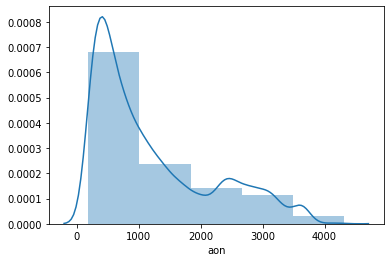

In [96]:
#Lets now take a look at the AON column, it might be a good predictor
sns.distplot(telecom_high_val['aon'], bins=5)
plt.show()

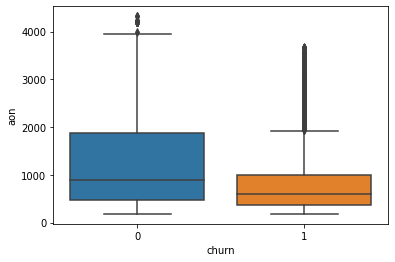

In [97]:
# Lets check the AON for churn and non-churn customers
#telecom_high_val.groupby('churn')['aon'].
sns.boxplot(x='churn',y='aon', data = telecom_high_val)
plt.show()

In [98]:
# Lets define a function that will return the age buckets
def ageBucketForAon(age):
    if 0<age<=1000:
        return 0
    else:
        return 1

In [99]:
telecom_high_val['aon_bucket'] = telecom_high_val['aon'].apply(lambda x: ageBucketForAon(x))

In [100]:
# It is obvious that the customers who have been long in the network are less likely to churn
telecom_high_val.pivot_table(index=['churn'], columns=['aon_bucket'], values=['aon'], aggfunc= len)

aon       
aon_bucket      0      1
churn                   
0           14681  12473
1            2145    702

In [101]:
# lets drop AON
telecom_high_val = telecom_high_val.drop(columns=['aon'])

### Lets derive a set of columns which shows the change in the usage in 3rd month from the average usage in the first two months

In [102]:
telecom_high_val.shape

(30001, 83)

In [103]:
# lets introduce some new features representing average between month 1 and 2

telecom_high_val['arpu_avg'] = round(((telecom_high_val['arpu_6']+ telecom_high_val['arpu_7'])/2),2)

telecom_high_val['ic_others_avg'] = round(((telecom_high_val['ic_others_6']+ telecom_high_val['ic_others_7'])/2),2)

telecom_high_val['isd_ic_avg'] = round(((telecom_high_val['isd_ic_mou_6']+ telecom_high_val['isd_ic_mou_7'])/2),2)

telecom_high_val['loc_ic_avg'] = round(((telecom_high_val['loc_ic_mou_6']+ telecom_high_val['loc_ic_mou_7'])/2),2)

telecom_high_val['loc_og_avg'] = round(((telecom_high_val['loc_og_mou_6']+ telecom_high_val['loc_og_mou_7'])/2),2)

telecom_high_val['isd_og_avg'] = round(((telecom_high_val['isd_og_mou_6']+ telecom_high_val['isd_og_mou_7'])/2),2)


telecom_high_val['std_ic_avg'] = round(((telecom_high_val['std_ic_mou_6']+ telecom_high_val['std_ic_mou_7'])/2),2)

telecom_high_val['std_og_avg'] = round(((telecom_high_val['std_og_mou_6']+ telecom_high_val['std_og_mou_7'])/2),2)


telecom_high_val['total_ic_avg'] = round(((telecom_high_val['total_ic_mou_6']+ telecom_high_val['total_ic_mou_7'])/2),2)

telecom_high_val['total_og_avg'] = round(((telecom_high_val['total_og_mou_6']+ telecom_high_val['total_og_mou_7'])/2),2)


telecom_high_val['total_rech_amt_avg'] = round(((telecom_high_val['total_rech_amt_6']+ 
                                                 telecom_high_val['total_rech_amt_7'])/2),2)

telecom_high_val['total_rech_amt_data_avg'] = round(((telecom_high_val['total_rech_amt_data_6']+
                                                                        telecom_high_val['total_rech_amt_data_7'])/2),2)


telecom_high_val['total_rech_num_avg'] = round(((telecom_high_val['total_rech_num_6']+
                                                                        telecom_high_val['total_rech_num_7'])/2),2)


telecom_high_val['vol_data_2g_avg'] = round(((telecom_high_val['vol_2g_mb_6']+
                                                                        telecom_high_val['vol_2g_mb_7'])/2),2)


telecom_high_val['vol_data_3g_avg'] = round(((telecom_high_val['vol_3g_mb_6']+
                                                                        telecom_high_val['vol_3g_mb_7'])/2),2)

telecom_high_val['max_rech_amt_avg'] = round(((telecom_high_val['max_rech_amt_6']+
                                                                        telecom_high_val['max_rech_amt_7'])/2),2)


telecom_high_val['vbc_avg'] = round(((telecom_high_val['jun_vbc_3g']+
                                                                        telecom_high_val['jul_vbc_3g'])/2),2)


telecom_high_val['og_others_avg'] = round(((telecom_high_val['og_others_6']+
                                                                        telecom_high_val['og_others_7'])/2),2)



telecom_high_val['roam_ic_avg'] = round(((telecom_high_val['roam_ic_mou_6']+
                                                                        telecom_high_val['roam_ic_mou_7'])/2),2)


telecom_high_val['roam_og_avg'] = round(((telecom_high_val['roam_og_mou_6']+
                                                                        telecom_high_val['roam_og_mou_7'])/2),2)



telecom_high_val['spl_ic_avg'] = round(((telecom_high_val['spl_ic_mou_6']+
                                                                        telecom_high_val['spl_ic_mou_7'])/2),2)


telecom_high_val['spl_og_avg'] = round(((telecom_high_val['spl_og_mou_6']+
                                                                        telecom_high_val['spl_og_mou_7'])/2),2)

In [104]:
telecom_high_val['arpu_diff'] = telecom_high_val['arpu_8'] - telecom_high_val['arpu_avg']

telecom_high_val['ic_others_diff'] = telecom_high_val['ic_others_8'] - telecom_high_val['ic_others_avg']

telecom_high_val['isd_ic_diff'] = telecom_high_val['isd_ic_mou_8'] - telecom_high_val['isd_ic_avg']

telecom_high_val['loc_ic_diff'] = telecom_high_val['loc_ic_mou_8'] - telecom_high_val['loc_ic_avg']

telecom_high_val['loc_og_diff'] = telecom_high_val['loc_og_mou_8'] - telecom_high_val['loc_og_avg']



telecom_high_val['isd_og_diff'] = telecom_high_val['isd_og_mou_8'] -  telecom_high_val['isd_og_avg']


telecom_high_val['std_ic_diff'] = telecom_high_val['std_ic_mou_8'] - telecom_high_val['std_ic_avg']

telecom_high_val['std_og_diff'] = telecom_high_val['std_og_mou_8'] - telecom_high_val['std_og_avg']


telecom_high_val['total_ic_diff'] = telecom_high_val['total_ic_mou_8'] - telecom_high_val['total_ic_avg']

telecom_high_val['total_og_diff'] = telecom_high_val['total_og_mou_8'] - telecom_high_val['total_og_avg']


telecom_high_val['total_rech_amt_diff'] = telecom_high_val['total_rech_amt_8'] - telecom_high_val['total_rech_amt_avg']

telecom_high_val['total_rech_amt_data_diff'] = telecom_high_val['total_rech_amt_data_8']-telecom_high_val['total_rech_amt_data_avg']


telecom_high_val['total_rech_num_diff'] = telecom_high_val['total_rech_num_8'] - telecom_high_val['total_rech_num_avg']


telecom_high_val['vol_data_2g_diff'] = telecom_high_val['vol_2g_mb_8'] - telecom_high_val['vol_data_2g_avg']


telecom_high_val['vol_data_3g_diff'] = telecom_high_val['vol_3g_mb_8'] - telecom_high_val['vol_data_3g_avg']

telecom_high_val['max_rech_amt_diff'] = telecom_high_val['max_rech_amt_8'] - telecom_high_val['max_rech_amt_avg']


telecom_high_val['vbc_diff'] = telecom_high_val['aug_vbc_3g'] - telecom_high_val['vbc_avg']

telecom_high_val['og_others_diff'] = telecom_high_val['og_others_8'] - telecom_high_val['og_others_avg']



telecom_high_val['roam_ic_diff'] = telecom_high_val['roam_ic_mou_8'] - telecom_high_val['roam_ic_avg']


telecom_high_val['roam_og_diff'] = telecom_high_val['roam_og_mou_8'] - telecom_high_val['roam_og_avg']



telecom_high_val['spl_ic_diff'] = telecom_high_val['spl_ic_mou_8'] - telecom_high_val['spl_ic_avg']


telecom_high_val['spl_og_diff'] = telecom_high_val['spl_og_mou_8'] - telecom_high_val['spl_og_avg']


In [105]:
# drop columns for month 1 and 2 for which we have derived new features
cols_6 = telecom_high_val.filter(regex='6').columns
cols_6 = cols_6.delete([21,22,23,24])
cols_6

Index(['arpu_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'total_rech_amt_data_6'], dtype='object')

In [106]:
# drop columns for month 1 and 2 for which we have derived new features
cols_7 = telecom_high_val.filter(regex='7').columns
cols_7 = cols_7.delete([21,22,23,24])
cols_7

Index(['arpu_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'vol_2g_mb_7', 'vol_3g_mb_7', 'total_rech_amt_data_7'], dtype='object')

In [107]:
telecom_high_val.shape

(30001, 127)

In [108]:
telecom_high_val = telecom_high_val.drop(columns=cols_6)
telecom_high_val = telecom_high_val.drop(columns=cols_7)
telecom_high_val.shape

(30001, 83)

In [109]:
# We don't need jun_vbc_3g and jul_vbc_3g anymore
telecom_high_val = telecom_high_val.drop(columns=['jun_vbc_3g','jul_vbc_3g'])
telecom_high_val.shape

(30001, 81)

In [110]:
# Lets check the class imbalance before we do train_test split
round(telecom_high_val['churn'].astype('category').value_counts()/len(telecom_high_val.index),2)

0    0.91
1    0.09
Name: churn, dtype: float64

### Lets now observe some behavior in the action month for the customers who churned vs who didn't

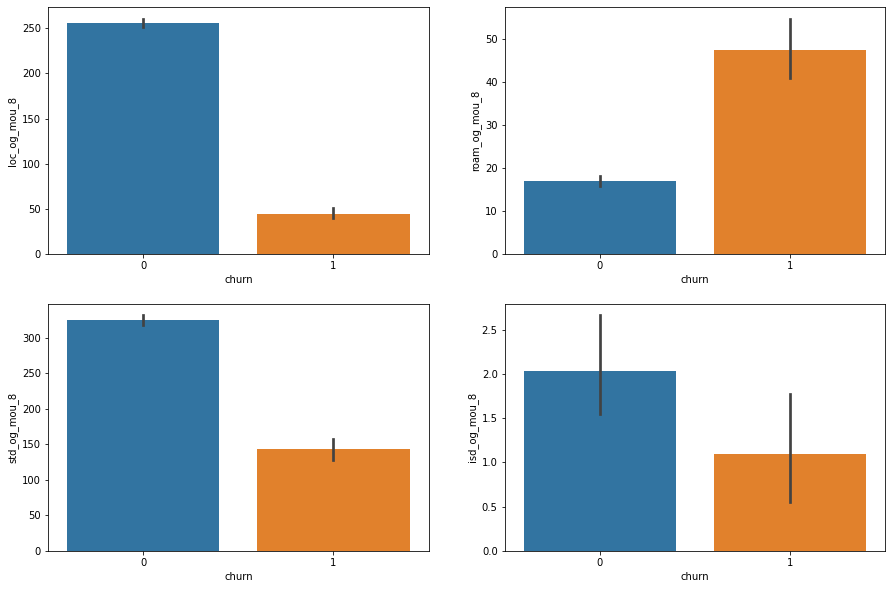

In [111]:
# Lets see the customer behavior in terms of outgoing calls

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['loc_og_mou_8'])
plt.subplot(2,2,2)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['roam_og_mou_8'])
plt.subplot(2,2,3)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['std_og_mou_8'])
plt.subplot(2,2,4)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['isd_og_mou_8'])
plt.show()

# All the behaviors are expected, outgoing calls dropped significantly for the churn customers except roaming. 
# maybe because they were in a rush to exhaust the minutes?

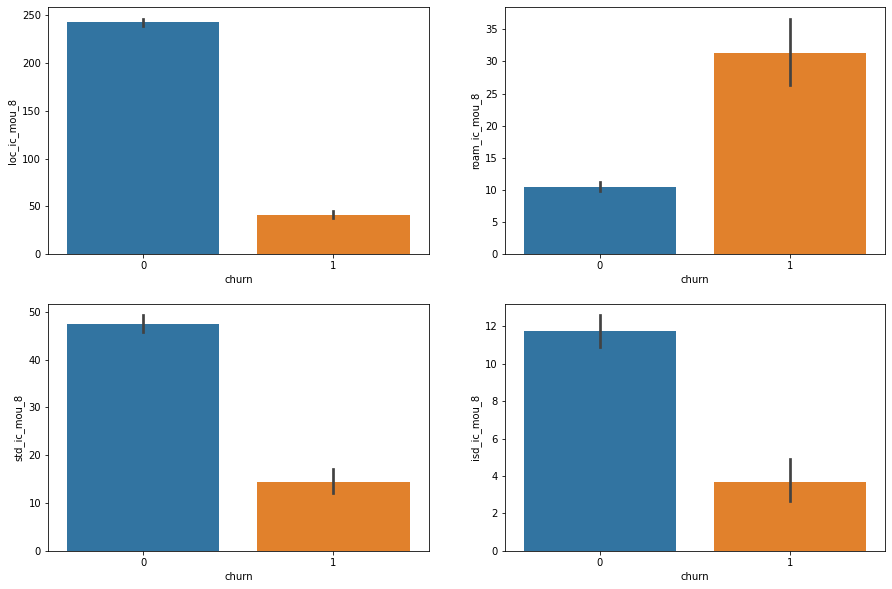

In [112]:
# Lets look at the incoming call behavior

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['loc_ic_mou_8'])
plt.subplot(2,2,2)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['roam_ic_mou_8'])
plt.subplot(2,2,3)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['std_ic_mou_8'])
plt.subplot(2,2,4)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['isd_ic_mou_8'])
plt.show()

# # All the behaviors are expected, incoming calls dropped significantly for the churn customers except roaming. 

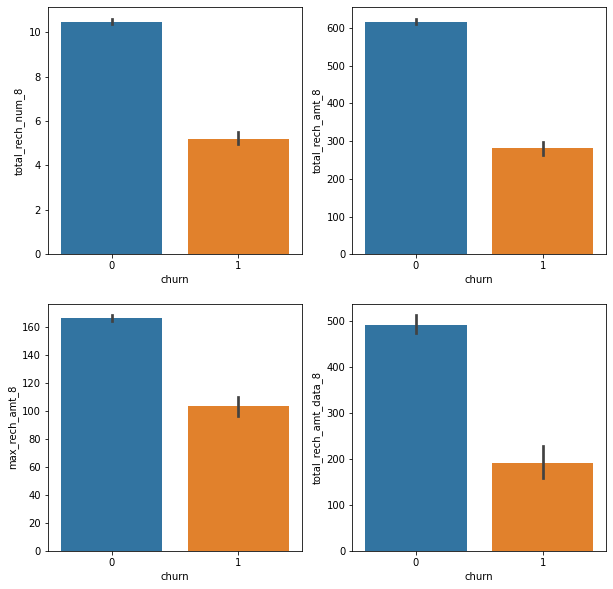

In [113]:
# Lets look at the echarge and data usage behavior
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['total_rech_num_8'])
plt.subplot(2,2,2)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['total_rech_amt_8'])
plt.subplot(2,2,3)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['max_rech_amt_8'])
plt.subplot(2,2,4)
sns.barplot(data=telecom_high_val, x=telecom_high_val['churn'], y=telecom_high_val['total_rech_amt_data_8'])
plt.show()

# It is apparent that for churn customers the action month recharge and data usage dropped significantly

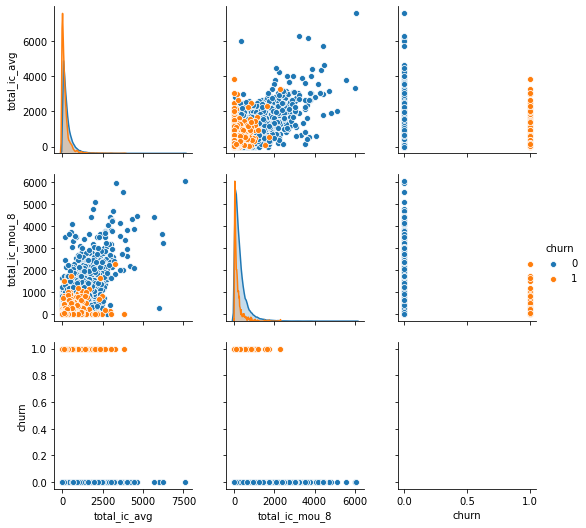

In [116]:
# Lets look at the incoing calls in a little different perspective
sns.pairplot(telecom_high_val[['total_ic_avg','total_ic_mou_8','churn']],hue='churn')
plt.show()

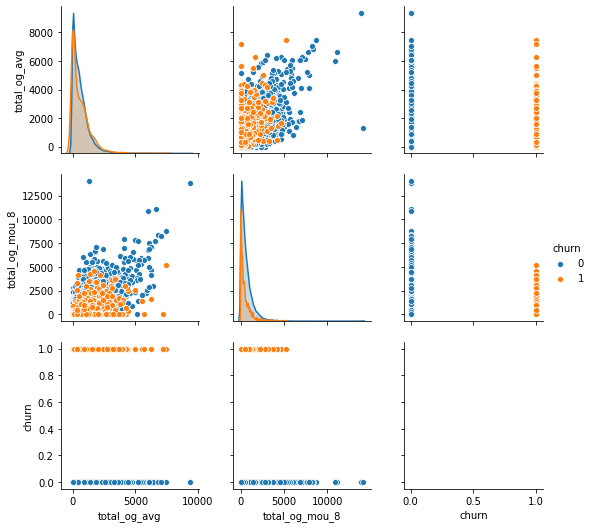

In [117]:
# Lets look at the outgoing calls in a little different perspective
sns.pairplot(telecom_high_val[['total_og_avg','total_og_mou_8','churn']],hue='churn')
plt.show()

<hr>

## Splitting the Data into Training and Testing Sets

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
# we are stratifing the churn column to make sure we have equal class imbalance in train and test data
df_train, df_test = train_test_split(telecom_high_val, train_size=0.7, test_size=0.3, random_state=100, 
                                     stratify=telecom_high_val['churn'])
print(df_train.shape)
print(df_test.shape)

(21000, 81)
(9001, 81)


In [120]:
y_train = df_train.pop('churn')
X_train = df_train
y_test = df_test.pop('churn')
X_test = df_test

In [121]:
# lets check the class imbalance in train and test sets
print(round(y_train.astype('category').value_counts()/len(y_train.index),2))
print(round(y_test.astype('category').value_counts()/len(y_test.index),2))

0    0.91
1    0.09
Name: churn, dtype: float64
0    0.91
1    0.09
Name: churn, dtype: float64


The class imbalance is pretty much the same in train and set sets

### Lets now scale the numeric variables

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler()
num_var = X_train.select_dtypes(include=['float64','int64']).columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

### PCA

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA(0.95, random_state=100)

In [126]:
X_train_pca = pca.fit_transform(X_train)

In [127]:
X_train_pca.shape

(21000, 41)

In [128]:
# Lets look at the explained vaiance ratio
pca.explained_variance_ratio_

array([0.09197955, 0.07185822, 0.06323763, 0.05259258, 0.04593479,
       0.03678562, 0.03320221, 0.03075227, 0.02974799, 0.02900367,
       0.02716474, 0.02592771, 0.02421497, 0.02335392, 0.02319871,
       0.02168189, 0.02128825, 0.02017327, 0.0195373 , 0.01883568,
       0.0180422 , 0.01655555, 0.0161995 , 0.0158328 , 0.01475989,
       0.01455624, 0.01392795, 0.0135267 , 0.01310329, 0.01240302,
       0.01114025, 0.01092889, 0.01076092, 0.01003206, 0.00928681,
       0.00925096, 0.00844387, 0.00708741, 0.00656228, 0.00624406,
       0.00606726])

#### Lets now scale test set and apply PCA

In [129]:
X_test[num_var] = scaler.transform(X_test[num_var])

In [130]:
X_test_pca = pca.transform(X_test)

### Now lets apply Logistic regression on the train and test data

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
# We are using class-weight='balanced' to handle class imbalance
lr_model = LogisticRegression(random_state=100, n_jobs=-1, class_weight='balanced')
model_pca = lr_model.fit(X_train_pca, y_train)

In [133]:
# Predicting on train set
y_train_pred = model_pca.predict(X_train_pca)

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

In [135]:
score = accuracy_score(y_train, y_train_pred)
score

0.7981904761904762

In [136]:
# Lets predict on the test set
y_test_pred = model_pca.predict(X_test_pca)
test_score = accuracy_score(y_test, y_test_pred)
test_score

0.7970225530496612

### Looks like we got pretty good accuracy score on the test set

In [137]:
# lets now look at the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[6460, 1687],
       [ 140,  714]], dtype=int64)

In [138]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negative

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8360655737704918

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.7929299128513563

In [141]:
# Lets calculate Precision
TP/float(TP+FP)

0.29737609329446063

In [142]:
# Lets look at the ROCAUC score
pred_probs_test = model_pca.predict_proba(X_test_pca)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.880234789950123

### So, we have achieved a good sensitivity (83.6%) but the Precision is quite low which means we have high false positives. In this use case we will focus more on Sensitivity/Recall as it is more important to identify the churn customers even if there are some false positives

<hr>

## Random Forest with PCA

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
# We are using class_weight='balanced_subsample' to handle class imbalance
rfc = RandomForestClassifier(random_state=100, n_jobs=-1, class_weight='balanced_subsample')

In [145]:
# Lets first fit a vanilla Random Forest model on the PCA output
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

In [146]:
y_train_pred = rfc.predict(X_train_pca)

In [147]:
random_forest_score_train = accuracy_score(y_train, y_train_pred)
random_forest_score_train

0.9904761904761905

In [148]:
y_test_pred = rfc.predict(X_test_pca)

In [149]:
random_forest_score = accuracy_score(y_test, y_test_pred)
random_forest_score

0.9140095544939452

In [150]:
# lets now look at the confusion matrix
cm2 = confusion_matrix(y_test, y_test_pred)
cm2

array([[8038,  109],
       [ 665,  189]], dtype=int64)

In [151]:
TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] 

In [152]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.22131147540983606

In [153]:
# Let us calculate specificity
TN / float(TN+FP)

0.9866208420277403

In [154]:
# Lets look at the ROCAUC score
pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.8248977583737236

#### So, the vanilla Random Forest model is suffering from class imbalance. While it is predicting the negative class quite well, the Sensitivity is really low. Lets now tune the parameters of the random forest

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
n_folds = 5
paramters = {'max_depth': range(2,20,2)}

rf = RandomForestClassifier(random_state=100, class_weight='balanced_subsample')

grid = GridSearchCV(rf, param_grid=paramters, 
                    scoring='recall', cv=n_folds, verbose=1, return_train_score=True, n_jobs=-1)
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   10.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
 

In [157]:
print("Best Recall: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best Recall:  0.735058806983959
Best hyperparameters:  {'max_depth': 4}


In [158]:
scores = grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.469539,0.028918,0.017050,0.004852,2,{'max_depth': 2},0.724311,0.719298,0.721805,0.690955,0.716080,0.714491,0.012078,3,0.742785,0.730866,0.722710,0.708464,0.740439,0.729053,0.012535
1,0.664900,0.046957,0.014107,0.004941,4,{'max_depth': 4},0.741855,0.749373,0.746867,0.738693,0.698492,0.735059,0.018658,1,0.781681,0.787955,0.763488,0.769279,0.784953,0.777471,0.009447
2,0.890380,0.092184,0.022554,0.014777,6,{'max_depth': 6},0.714286,0.714286,0.756892,0.731156,0.695980,0.722520,0.020474,2,0.794228,0.790464,0.802384,0.778056,0.793730,0.791773,0.007903
3,0.967895,0.067353,0.010060,0.000009,8,{'max_depth': 8},0.661654,0.686717,0.699248,0.675879,0.655779,0.675856,0.015937,4,0.833752,0.836261,0.830615,0.838245,0.842633,0.836301,0.004067
4,1.093488,0.037471,0.010055,0.000005,10,{'max_depth': 10},0.581454,0.604010,0.616541,0.603015,0.550251,0.591056,0.023312,5,0.872647,0.868883,0.881430,0.860815,0.889028,0.874561,0.009812


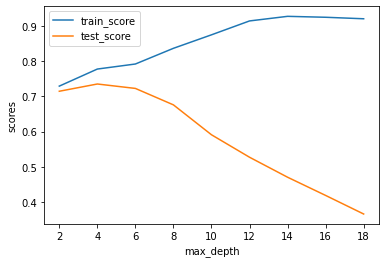

In [159]:
plt.plot(scores['param_max_depth'], scores['mean_train_score'])
plt.plot(scores['param_max_depth'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.show()

In [160]:
# Lets tune n_estimators

n_fold = 5
parameters = {'n_estimators': [10, 50, 100,200,300,400,1000]} 

rf = RandomForestClassifier(random_state=100, class_weight='balanced_subsample', max_depth=4)

grid = GridSearchCV(rf, param_grid=parameters, cv=n_fold, 
                    verbose=1, return_train_score=True, scoring='recall',n_jobs=-1)
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
    

In [161]:
print("Best Recall: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best Recall:  0.746613366690236
Best hyperparameters:  {'n_estimators': 1000}


In [162]:
scores = grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.691494,0.099115,0.014362,0.010300,10,{'n_estimators': 10},0.741855,0.749373,0.746867,0.738693,0.698492,0.735059,0.018658,6,0.781681,0.787955,0.763488,0.769279,0.784953,0.777471,0.009447
1,2.975903,0.158227,0.027138,0.003726,50,{'n_estimators': 50},0.724311,0.726817,0.749373,0.741206,0.711055,0.730552,0.013421,7,0.773526,0.774780,0.769762,0.757367,0.782445,0.771576,0.008215
2,5.695910,0.103112,0.052014,0.005786,100,{'n_estimators': 100},0.719298,0.739348,0.746867,0.748744,0.731156,0.737082,0.010847,5,0.776035,0.785445,0.774153,0.761129,0.782445,0.775841,0.008429
3,11.404321,0.132069,0.106254,0.004948,200,{'n_estimators': 200},0.731830,0.746867,0.744361,0.756281,0.733668,0.742601,0.008992,3,0.779172,0.785445,0.778545,0.766771,0.791223,0.780231,0.008163
4,17.936355,0.454288,0.173954,0.023568,300,{'n_estimators': 300},0.726817,0.749373,0.751880,0.758794,0.731156,0.743603,0.012404,2,0.777917,0.782936,0.782936,0.771787,0.789969,0.781109,0.006038


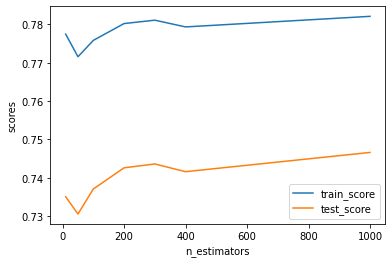

In [163]:
plt.plot(scores['param_n_estimators'], scores['mean_train_score'])
plt.plot(scores['param_n_estimators'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.show()

In [164]:
# Lets tune max_features

n_fold = 5
parameters = {'max_features': range(5,41,5)}  

rf = RandomForestClassifier(random_state=100, class_weight='balanced_subsample', max_depth=4)

grid = GridSearchCV(rf, param_grid=parameters, cv=n_fold, 
                    verbose=1, return_train_score=True, scoring='recall',n_jobs=-1)
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
    

In [165]:
print("Best Recall: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best Recall:  0.7671946182157955
Best hyperparameters:  {'max_features': 20}


In [166]:
scores = grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.704381,0.150154,0.011171,0.001934,5,{'max_features': 5},0.764411,0.746867,0.751880,0.748744,0.736181,0.749618,0.009087,5,0.778545,0.783563,0.785445,0.768652,0.793103,0.781862,0.008095
1,1.115716,0.193067,0.009203,0.000745,10,{'max_features': 10},0.759398,0.749373,0.759398,0.776382,0.733668,0.755644,0.014002,4,0.775408,0.797992,0.787327,0.781818,0.795611,0.787631,0.008418
2,1.327842,0.065195,0.009661,0.000804,15,{'max_features': 15},0.764411,0.736842,0.774436,0.781407,0.748744,0.761167,0.016385,2,0.800502,0.782309,0.779799,0.772414,0.793730,0.785751,0.010064
3,1.598898,0.017381,0.007646,0.002954,20,{'max_features': 20},0.744361,0.741855,0.789474,0.796482,0.763819,0.767195,0.022490,1,0.765370,0.772271,0.813676,0.785580,0.799373,0.787254,0.017614
4,1.941105,0.011617,0.008156,0.003188,25,{'max_features': 25},0.716792,0.724311,0.746867,0.753769,0.718593,0.732065,0.015264,7,0.753450,0.756587,0.767252,0.774295,0.763636,0.763044,0.007461


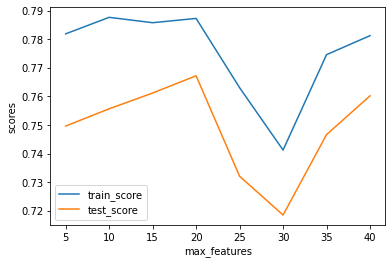

In [167]:
plt.plot(scores['param_max_features'], scores['mean_train_score'])
plt.plot(scores['param_max_features'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('max_features')
plt.ylabel('scores')
plt.show()

In [168]:
# Lets tune min_samples_leaf

n_fold = 5
parameters = {'min_samples_leaf': range(10,1000,50)}  

rf = RandomForestClassifier(random_state=100, class_weight='balanced_subsample', max_depth=4)

grid = GridSearchCV(rf, param_grid=parameters, cv=n_fold, 
                    verbose=1, return_train_score=True, scoring='recall',n_jobs=-1)
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
    

In [169]:
print("Best Recall: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best Recall:  0.7631730639712466
Best hyperparameters:  {'min_samples_leaf': 960}


In [170]:
scores = grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.692944,0.079005,0.009774,0.000748,10,{'min_samples_leaf': 10},0.741855,0.749373,0.769424,0.738693,0.698492,0.739570,0.023153,13,0.779799,0.788582,0.780427,0.768652,0.784326,0.780357,0.006644
1,0.678007,0.071701,0.015133,0.006018,60,{'min_samples_leaf': 60},0.729323,0.736842,0.754386,0.706030,0.723618,0.730042,0.015856,20,0.768507,0.772898,0.762861,0.753605,0.788088,0.769192,0.011439
2,0.672931,0.058200,0.008418,0.001195,110,{'min_samples_leaf': 110},0.726817,0.734336,0.756892,0.728643,0.713568,0.732052,0.014162,17,0.772271,0.781681,0.775408,0.752978,0.791223,0.774712,0.012649
3,0.696851,0.081961,0.010971,0.001892,160,{'min_samples_leaf': 160},0.721805,0.764411,0.764411,0.731156,0.713568,0.739072,0.021427,14,0.760351,0.799247,0.777290,0.783699,0.790596,0.782237,0.013151
4,0.717058,0.062444,0.011057,0.001955,210,{'min_samples_leaf': 210},0.719298,0.776942,0.751880,0.726131,0.683417,0.731538,0.031528,18,0.768507,0.804893,0.772271,0.735423,0.773668,0.770952,0.022043


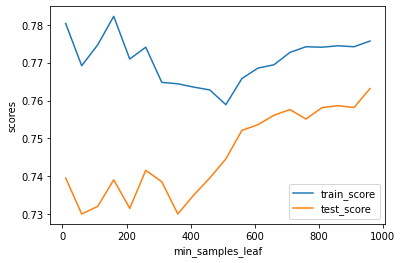

In [171]:
plt.plot(scores['param_min_samples_leaf'], scores['mean_train_score'])
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('scores')
plt.show()

In [172]:
# Lets tune min_samples_split

n_fold = 5
parameters = {'min_samples_split': range(50, 2000, 50)} 

rf = RandomForestClassifier(random_state=100, class_weight='balanced_subsample', max_depth=4)

grid = GridSearchCV(rf, param_grid=parameters, cv=n_fold, 
                    verbose=1, return_train_score=True, scoring='recall',n_jobs=-1)
grid.fit(X_train_pca, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:   20.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
    

In [173]:
print("Best Recall: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best Recall:  0.7571420693993899
Best hyperparameters:  {'min_samples_split': 1850}


In [174]:
scores = grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.672254,0.070474,0.010810,0.001701,50,{'min_samples_split': 50},0.746867,0.739348,0.766917,0.726131,0.698492,0.735554,0.022751,25,0.781681,0.782936,0.778545,0.769279,0.784953,0.779479,0.005508
1,0.672014,0.069837,0.009890,0.000986,100,{'min_samples_split': 100},0.749373,0.731830,0.766917,0.701005,0.718593,0.733547,0.023019,28,0.774153,0.774780,0.778545,0.766771,0.788715,0.776593,0.007162
2,0.599587,0.009008,0.009665,0.000811,150,{'min_samples_split': 150},0.734336,0.729323,0.739348,0.713568,0.708543,0.725026,0.011943,38,0.774153,0.776035,0.752196,0.754232,0.789342,0.769192,0.014072
3,0.619717,0.024757,0.009994,0.001093,200,{'min_samples_split': 200},0.726817,0.746867,0.746867,0.713568,0.690955,0.725018,0.021210,39,0.768507,0.784818,0.763488,0.743574,0.775549,0.767187,0.013811
4,0.640228,0.018641,0.009175,0.000399,250,{'min_samples_split': 250},0.734336,0.746867,0.759398,0.708543,0.695980,0.729028,0.023581,37,0.769134,0.795483,0.774780,0.744201,0.769906,0.770701,0.016347


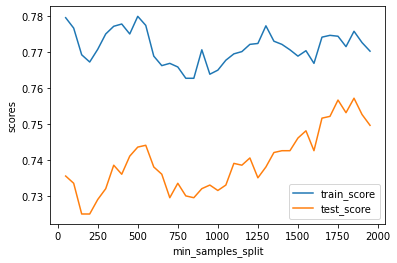

In [175]:
plt.plot(scores['param_min_samples_split'], scores['mean_train_score'])
plt.plot(scores['param_min_samples_split'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('scores')
plt.show()

In [176]:
# Now lets create the param_grid based on the results we got so far

param_grid = {
    'max_depth': 4,
    'n_estimators':300,
    'max_features':20,
    'min_samples_leaf':960,
    'min_samples_split':1850
}

# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=param_grid['max_depth'],
                             min_samples_leaf=param_grid['min_samples_leaf'], 
                             min_samples_split=param_grid['min_samples_split'],
                             max_features=param_grid['max_features'],
                             n_estimators=param_grid['n_estimators'],
                             n_jobs=-1,
                             verbose=0,
                             random_state=100,
                             class_weight='balanced_subsample')

rfc.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=4, max_features=20,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=960,
                       min_samples_split=1850, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=-1, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

In [177]:
y_train_pred = rfc.predict(X_train_pca)
random_forest_score_train = accuracy_score(y_train, y_train_pred)
random_forest_score_train

0.8022380952380952

In [178]:
y_test_pred = rfc.predict(X_test_pca)
random_forest_score_test = accuracy_score(y_test, y_test_pred)
random_forest_score_test

0.7940228863459615

In [179]:
# lets now look at the confusion matrix
cm3 = confusion_matrix(y_test, y_test_pred)
cm3

array([[6483, 1664],
       [ 190,  664]], dtype=int64)

In [180]:
TP = cm3[1,1] # true positive 
TN = cm3[0,0] # true negatives
FP = cm3[0,1] # false positives
FN = cm3[1,0]

In [181]:
# Let's see the sensitivity
TP / float(TP+FN)

0.7775175644028103

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.7957530379280717

In [183]:
# Lets look at the ROCAUC score
pred_probs_test = rfc.predict_proba(X_test_pca)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.8604594038868347

### So, we have achieved a decent model with Sensitivity = 77.8% and AUC Score = 86%

<hr>

## XGBoost on PCA data

In [184]:
from xgboost import XGBClassifier

In [185]:
# We are using scal_pos_weight to handle class imbalance
xgb_classifier = XGBClassifier(random_state=100, scale_pos_weight=15)

In [186]:
# Lets fit the classifier
xgb_classifier.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=15, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [187]:
y_train_pred = xgb_classifier.predict(X_train_pca)
xgboost_train_score = accuracy_score(y_train, y_train_pred)
xgboost_train_score

0.988

In [188]:
y_test_pred = xgb_classifier.predict(X_test_pca)
xgboost_test_score = accuracy_score(y_test, y_test_pred)
xgboost_test_score

0.9046772580824353

In [189]:
# lets now look at the confusion matrix
cm4 = confusion_matrix(y_test, y_test_pred)
cm4

array([[7652,  495],
       [ 363,  491]], dtype=int64)

In [190]:
TP = cm4[1,1] # true positive 
TN = cm4[0,0] # true negatives
FP = cm4[0,1] # false positives
FN = cm4[1,0]

In [191]:
# Let's see the sensitivity of our XGBoost model
TP / float(TP+FN)

0.5749414519906323

In [192]:
# Let us calculate specificity
TN / float(TN+FP)

0.9392414385663435

In [193]:
# Lets look at the ROCAUC score
pred_probs_test = xgb_classifier.predict_proba(X_test_pca)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.8701733285538649

#### The vanilla XGBoost model is suffering from low sensitivity. Lets tune the hyperparams

In [194]:
# Lets tune min_child_weight
xgb_classifier = XGBClassifier(random_state=100, n_estimators=100, scale_pos_weight=15)
folds=5
param_grid = {'min_child_weight': [5, 10, 20, 50, 75, 100] }

cv = GridSearchCV(xgb_classifier, param_grid=param_grid,scoring='recall', 
                  cv=folds, n_jobs=-1,verbose=1, return_train_score=True)
cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=15,
                                     subsample=N

In [195]:
print("Best Recall: ", cv.best_score_)
print("Best hyperparameters: ", cv.best_params_)

Best Recall:  0.7405994152046783
Best hyperparameters:  {'min_child_weight': 100}


In [196]:
scores = cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,30.682543,0.380127,0.064627,0.002309,5,{'min_child_weight': 5},0.581454,0.571429,0.629073,0.620603,0.590452,0.598599,0.022412,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,31.577228,1.927502,0.070272,0.008319,10,{'min_child_weight': 10},0.604010,0.624060,0.639098,0.625628,0.587940,0.616148,0.018011,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,34.891719,1.484353,0.059361,0.006249,20,{'min_child_weight': 20},0.629073,0.646617,0.699248,0.680905,0.620603,0.655288,0.030179,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,30.402145,2.113540,0.056237,0.012496,50,{'min_child_weight': 50},0.691729,0.679198,0.716792,0.701005,0.685930,0.694930,0.013066,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,27.618508,2.679957,0.046865,0.009879,75,{'min_child_weight': 75},0.716792,0.706767,0.721805,0.746231,0.695980,0.717514,0.016867,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0


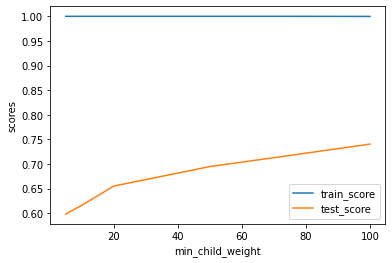

In [197]:
plt.plot(scores['param_min_child_weight'], scores['mean_train_score'])
plt.plot(scores['param_min_child_weight'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('min_child_weight')
plt.ylabel('scores')
plt.show()

In [198]:
# Lets tune colsample_bytree
xgb_classifier = XGBClassifier(random_state=100, n_estimators=100, scale_pos_weight=15)
folds=5
param_grid = {'colsample_bytree': [0.4,0.5, 0.6, 0.8, 1.0] }

cv = GridSearchCV(xgb_classifier, param_grid=param_grid,scoring='recall', 
                  cv=folds, n_jobs=-1,verbose=1, return_train_score=True)
cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=15,
                                     subsample=N

In [199]:
print("Best Recall: ", cv.best_score_)
print("Best hyperparameters: ", cv.best_params_)

Best Recall:  0.5755177486669534
Best hyperparameters:  {'colsample_bytree': 0.5}


In [200]:
scores = cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.725702,0.091242,0.056236,0.007654,0.4,{'colsample_bytree': 0.4},0.528822,0.566416,0.596491,0.590452,0.565327,0.569499,0.023872,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,16.092704,1.602222,0.066680,0.018008,0.5,{'colsample_bytree': 0.5},0.541353,0.588972,0.586466,0.587940,0.572864,0.575518,0.018054,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,22.285649,1.605271,0.066586,0.005888,0.6,{'colsample_bytree': 0.6},0.556391,0.576441,0.611529,0.557789,0.540201,0.568472,0.024399,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,27.039451,0.759227,0.059136,0.006152,0.8,{'colsample_bytree': 0.8},0.523810,0.573935,0.598997,0.592965,0.552764,0.568492,0.027580,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,27.515766,4.933386,0.040616,0.007654,1,{'colsample_bytree': 1.0},0.523810,0.583960,0.568922,0.597990,0.535176,0.561970,0.028296,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0


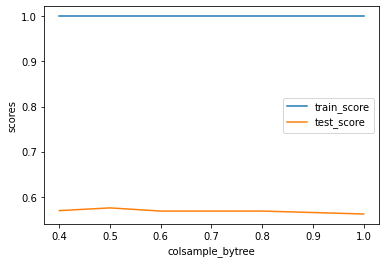

In [201]:
plt.plot(scores['param_colsample_bytree'], scores['mean_train_score'])
plt.plot(scores['param_colsample_bytree'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('colsample_bytree')
plt.ylabel('scores')
plt.show()

In [202]:
# Lets tune max_depth
xgb_classifier = XGBClassifier(random_state=100, n_estimators=100, scale_pos_weight=15)
folds=5
param_grid = {'max_depth': [3, 4, 5, 6] }

cv = GridSearchCV(xgb_classifier, param_grid=param_grid,scoring='recall', 
                  cv=folds, n_jobs=-1,verbose=1, return_train_score=True)
cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, s

In [203]:
print("Best Recall: ", cv.best_score_)
print("Best hyperparameters: ", cv.best_params_)

Best Recall:  0.7892674375577614
Best hyperparameters:  {'max_depth': 3}


In [204]:
scores = cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.089411,0.238409,0.031242,0.000001,3,{'max_depth': 3},0.776942,0.769424,0.807018,0.816583,0.776382,0.789267,0.018830,1,0.964868,0.964241,0.966750,0.964263,0.973668,0.966758,0.003574
1,20.300962,1.141981,0.034368,0.006249,4,{'max_depth': 4},0.724311,0.724311,0.746867,0.731156,0.698492,0.725028,0.015617,2,0.994981,0.994981,0.996236,0.997492,0.996238,0.995986,0.000940
2,27.224850,0.112822,0.046864,0.009880,5,{'max_depth': 5},0.654135,0.636591,0.656642,0.665829,0.625628,0.647765,0.014563,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,24.193368,4.088356,0.037491,0.007653,6,{'max_depth': 6},0.523810,0.583960,0.568922,0.597990,0.535176,0.561970,0.028296,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


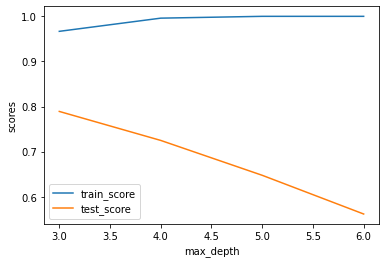

In [205]:
plt.plot(scores['param_max_depth'], scores['mean_train_score'])
plt.plot(scores['param_max_depth'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.show()

In [206]:
# Lets tune learning_rate
xgb_classifier = XGBClassifier(random_state=100, n_estimators=100, scale_pos_weight=15)
folds=5
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.9] }

cv = GridSearchCV(xgb_classifier, param_grid=param_grid,scoring='recall', 
                  cv=folds, n_jobs=-1,verbose=1, return_train_score=True)
cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=15,
                                     subsample=N

In [207]:
print("Best Recall: ", cv.best_score_)
print("Best hyperparameters: ", cv.best_params_)

Best Recall:  0.8138532419227058
Best hyperparameters:  {'learning_rate': 0.001}


In [208]:
scores = cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,31.876709,0.444331,0.040616,7.653818e-03,0.001,{'learning_rate': 0.001},0.812030,0.791980,0.824561,0.839196,0.801508,0.813853,0.016679,1,0.905270,0.901506,0.883312,0.929154,0.890909,0.902030,0.015624
1,32.830556,0.727258,0.046862,7.294206e-07,0.01,{'learning_rate': 0.01},0.804511,0.789474,0.812030,0.831658,0.806533,0.808839,0.013638,2,0.919072,0.923463,0.914053,0.924765,0.915987,0.919468,0.004138
2,32.995370,0.120760,0.059362,6.248808e-03,0.1,{'learning_rate': 0.1},0.694236,0.716792,0.724311,0.738693,0.703518,0.715508,0.015575,3,0.999373,0.998745,0.998118,0.998746,0.998746,0.998746,0.000397
3,32.447702,0.371449,0.056238,1.249676e-02,0.5,{'learning_rate': 0.5},0.518797,0.496241,0.531328,0.540201,0.492462,0.515805,0.018828,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,27.933140,7.628418,0.056237,1.249557e-02,0.9,{'learning_rate': 0.9},0.486216,0.486216,0.521303,0.532663,0.484925,0.502262,0.020505,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


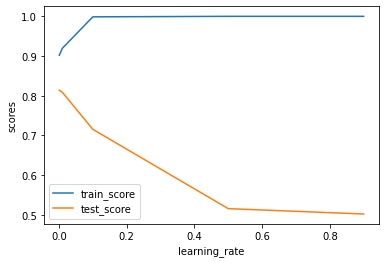

In [209]:
plt.plot(scores['param_learning_rate'], scores['mean_train_score'])
plt.plot(scores['param_learning_rate'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('learning_rate')
plt.ylabel('scores')
plt.show()

In [210]:
# Now lets apply the parameters that we have obtained above
xgb_classifier = XGBClassifier(random_state=100, n_estimators=100, scale_pos_weight=15, colsample_bytree=0.5,
                              learning_rate=0.001, max_depth=3, min_child_weight=100)

In [211]:
xgb_classifier.fit(X_train_pca, y_train)
y_train_pred = xgb_classifier.predict(X_train_pca)
xgboost_train_score = accuracy_score(y_train, y_train_pred)
xgboost_train_score

0.715047619047619

In [212]:
y_test_pred = xgb_classifier.predict(X_test_pca)
xgboost_test_score = accuracy_score(y_test, y_test_pred)
xgboost_test_score

0.7088101322075325

In [213]:
# lets now look at the confusion matrix
cm4 = confusion_matrix(y_test, y_test_pred)
cm4

array([[5638, 2509],
       [ 112,  742]], dtype=int64)

In [214]:
TP = cm4[1,1] # true positive 
TN = cm4[0,0] # true negatives
FP = cm4[0,1] # false positives
FN = cm4[1,0]

In [215]:
# Let's see the sensitivity of our XGBoost model
TP / float(TP+FN)

0.8688524590163934

In [216]:
# Let us calculate specificity
TN / float(TN+FP)

0.6920338775009206

In [217]:
# Lets look at the ROCAUC score
pred_probs_test = xgb_classifier.predict_proba(X_test_pca)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.8684411784743395

### Looks like we have got fairly good sensitivity (86.9%) as well as AUC score (86.8%). This is the best model that we have achieved with PCA

### Now we will switch to a non-PCA mode to build an interpretable model. For that we need to look at the multicollinearity of the features. Once we treat them, we will feed the dataset to a ML algorithm

In [218]:
# We will remove features that have a high correlation score
corr = telecom_high_val.corr()
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.abs().stack()
corr_triu[corr_triu > 0.6]

arpu_8                 total_rech_amt_8            0.955351
                       arpu_avg                    0.752204
                       total_rech_amt_avg          0.760100
loc_og_mou_8           loc_og_avg                  0.824573
std_og_mou_8           total_og_mou_8              0.851307
                       std_og_avg                  0.743048
                       total_og_avg                0.615080
isd_og_mou_8           isd_og_avg                  0.950979
og_others_8            og_others_diff              0.723946
total_og_mou_8         total_og_avg                0.725865
loc_ic_mou_8           total_ic_mou_8              0.896211
                       loc_ic_avg                  0.824149
                       total_ic_avg                0.739767
std_ic_mou_8           std_ic_avg                  0.740015
total_ic_mou_8         loc_ic_avg                  0.734850
                       total_ic_avg                0.806188
isd_ic_mou_8           isd_ic_avg       

In [219]:
# We will rmove some of the columns with high multicollinearity
mlc_cols = ['arpu_8','arpu_avg','loc_og_avg','std_og_avg','og_others_diff','total_og_avg','total_ic_mou_8',
           'std_ic_avg','loc_ic_avg','isd_ic_avg','ic_others_avg','total_rech_num_avg','last_day_rch_amt_8',
           'max_rech_amt_avg','vol_data_2g_avg','vol_3g_mb_8','vbc_avg','total_og_diff','vbc_avg']

telecom_high_val_corr = telecom_high_val.drop(columns=mlc_cols)
telecom_high_val_corr.shape

(30001, 63)

In [220]:
corr = telecom_high_val_corr.corr()
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.abs().stack()
corr_triu[corr_triu > 0.6]

std_og_mou_8           total_og_mou_8              0.851307
isd_og_mou_8           isd_og_avg                  0.950979
loc_ic_mou_8           total_ic_avg                0.739767
total_rech_amt_8       total_rech_amt_avg          0.736589
sachet_2g_6            sachet_2g_7                 0.696200
sachet_2g_7            sachet_2g_8                 0.721538
monthly_3g_6           monthly_3g_7                0.611599
monthly_3g_7           monthly_3g_8                0.654727
sachet_3g_6            sachet_3g_7                 0.667895
sachet_3g_7            sachet_3g_8                 0.669221
total_rech_amt_data_8  total_rech_amt_data_diff    0.675655
roam_ic_avg            roam_og_avg                 0.633495
spl_ic_avg             spl_ic_diff                 0.777862
arpu_diff              total_rech_amt_diff         0.836871
loc_ic_diff            total_ic_diff               0.854988
dtype: float64

In [221]:
mlc_cols = ['total_og_mou_8','isd_og_avg','total_ic_avg','total_rech_amt_avg'
           ,'sachet_2g_7','monthly_3g_7','sachet_3g_7','total_rech_amt_data_diff','spl_ic_avg',
           'arpu_diff','total_ic_diff']
telecom_high_val_corr = telecom_high_val_corr.drop(columns=mlc_cols)
telecom_high_val_corr.shape

(30001, 52)

In [222]:
corr = telecom_high_val_corr.corr()
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.abs().stack()
corr_triu[corr_triu > 0.6]

roam_ic_avg  roam_og_avg    0.633495
dtype: float64

We don't want to drop roaming related columns as they may be important indicators

In [223]:
# Lets do train test split while stratifying the churn column to handle class imbalance
df_train, df_test = train_test_split(telecom_high_val_corr, train_size = 0.7, test_size = 0.3, random_state = 100, 
                                     stratify=telecom_high_val['churn'])

In [224]:
y_train = df_train.pop('churn')
X_train = df_train
y_test = df_test.pop('churn')
X_test = df_test

In [225]:
# lets check the class imbalance in train and test sets
print(round(y_train.astype('category').value_counts()/len(y_train.index),2))
print(round(y_test.astype('category').value_counts()/len(y_test.index),2))

0    0.91
1    0.09
Name: churn, dtype: float64
0    0.91
1    0.09
Name: churn, dtype: float64


### Lets now scale the numeric variables

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
scaler = StandardScaler()
num_var = X_train.select_dtypes(include=['float64','int64']).columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

### Lets now do RFE for Feature selection

In [228]:
from sklearn.feature_selection import RFE

In [229]:
# Running RFE with LogisticRegression with the output number of the variable equal to 25 as we have too many (52) 
# predictor variables
lr_model = LogisticRegression(random_state=100, n_jobs=-1, class_weight='balanced')

# fit the model
lr_model.fit(X_train, y_train)

rfe = RFE(lr_model, 25) 
rfe = rfe.fit(X_train, y_train)
#Predict
y_train_pred = rfe.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.7959047619047619

In [230]:
# Lets look at the RFE output
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('roam_ic_mou_8', False, 21),
 ('roam_og_mou_8', False, 11),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_8', False, 4),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_8', False, 25),
 ('og_others_8', False, 13),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 27),
 ('ic_others_8', False, 24),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', True, 1),
 ('vol_2g_mb_8', False, 10),
 ('monthly_2g_6', False, 9),
 ('monthly_2g_7', False, 2),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_6', False, 17),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_6', True, 1),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_6', True, 1),
 ('sachet_3g_8', True, 1),
 ('aug_vbc_3g', False, 7),
 ('total_rech_amt_data_8', True, 1),
 ('aon_bucket', True, 1),
 ('total_rech_amt_data_avg', False, 18),
 ('vol_data_3g_avg', False, 8),
 ('og_others_avg', False, 12),
 ('roam_ic_avg', True, 1),
 ('roam_og_avg', True, 1),
 ('spl_og_avg', False, 26),


In [231]:
# Lets accept the RFE output, we will move ahead with 25 predictor variables
cols = X_train.columns[rfe.support_]
X_train_rfe = X_train[cols]

In [232]:
# Now lets fit the LogisticRegression model. We are using Lasso penalty for feature selection
lr_model = LogisticRegression(random_state=100, n_jobs=-1, class_weight='balanced', penalty='l1', solver='liblinear')
lr_model.fit(X_train_rfe, y_train), intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=100,

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [233]:
#Predict
y_train_pred = lr_model.predict(X_train_rfe)
accuracy_score(y_train, y_train_pred)

0.795952380952381

In [234]:
X_test[num_var] = scaler.transform(X_test[num_var])
X_test_rfe = X_test[cols]

In [235]:
#Predict on the test data
y_test_pred = lr_model.predict(X_test_rfe)
accuracy_score(y_test, y_test_pred)

0.7923564048439062

In [236]:
# lets now look at the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[6427, 1720],
       [ 149,  705]], dtype=int64)

In [237]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negative

In [238]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8255269320843092

In [239]:
# Let us calculate specificity
TN / float(TN+FP)

0.7888793420891126

In [240]:
# Lets calculate Precision
TP/float(TP+FP)

0.2907216494845361

In [241]:
# Lets look at the ROCAUC score
pred_probs_test = model_pca.predict_proba(X_test_pca)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.880234789950123

### So, we have achieved a good sensitivity (82.6%) and AUC score of 88%

In [242]:
# Lets look at the coefficients returned by the model
lr_model.coef_

array([[-0.56471789,  0.1151634 , -1.79688363, -0.19469161, -0.54167223,
        -0.1676196 , -0.16944524,  0.18177075, -0.42398368, -0.56605345,
         0.15497181, -0.31103731,  0.18196227, -0.31681261,  0.33813151,
        -0.30319259,  0.11560505,  0.18351851, -0.41353921, -0.13514766,
        -0.12246151, -0.25966909, -0.11133445, -0.1126076 , -0.2027346 ]])

In [243]:
# intercept
lr_model.intercept_[0]

-1.5895410326257062

In [244]:
# Logistic Regression model parameters
model_parameters = list(lr_model.coef_.reshape(25,1))
model_parameters = [val for param in model_parameters for val in param]
model_parameters = [round(param, 3) for param in model_parameters]
model_parameters.insert(0, round(lr_model.intercept_[0],3))
model_parameters = [x for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, model_parameters)), key=lambda x: abs(x[1]), reverse=True)

[('loc_ic_mou_8', -1.797),
 ('constant', -1.59),
 ('sachet_2g_8', -0.566),
 ('loc_og_mou_8', -0.565),
 ('spl_ic_mou_8', -0.542),
 ('monthly_2g_8', -0.424),
 ('loc_ic_diff', -0.414),
 ('total_rech_amt_data_8', 0.338),
 ('sachet_3g_8', -0.317),
 ('monthly_3g_8', -0.311),
 ('aon_bucket', -0.303),
 ('std_og_diff', -0.26),
 ('max_rech_amt_diff', -0.203),
 ('std_ic_mou_8', -0.195),
 ('roam_og_avg', 0.184),
 ('max_rech_amt_8', 0.182),
 ('sachet_3g_6', 0.182),
 ('total_rech_amt_8', -0.169),
 ('total_rech_num_8', -0.168),
 ('monthly_3g_6', 0.155),
 ('loc_og_diff', -0.135),
 ('std_ic_diff', -0.122),
 ('roam_ic_avg', 0.116),
 ('isd_og_mou_8', 0.115),
 ('vol_data_2g_diff', -0.113),
 ('total_rech_num_diff', -0.111)]

<hr>

## Random Forest without PCA

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [246]:
# We are using class_weight='balanced_subsample' to handle class imbalance
rfc = RandomForestClassifier(random_state=100, n_jobs=-1, class_weight='balanced_subsample')

In [247]:
# Lets first fit a vanilla Random Forest model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

In [248]:
y_train_pred = rfc.predict(X_train)

In [249]:
random_forest_score_train = accuracy_score(y_train, y_train_pred)
random_forest_score_train

0.9924761904761905

In [250]:
y_test_pred = rfc.predict(X_test)

In [251]:
random_forest_score = accuracy_score(y_test, y_test_pred)
random_forest_score

0.9334518386845906

In [252]:
# lets now look at the confusion matrix
cm2 = confusion_matrix(y_test, y_test_pred)
cm2

array([[7989,  158],
       [ 441,  413]], dtype=int64)

In [253]:
TP = cm2[1,1] # true positive 
TN = cm2[0,0] # true negatives
FP = cm2[0,1] # false positives
FN = cm2[1,0] 

In [254]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.48360655737704916

In [255]:
# Let us calculate specificity
TN / float(TN+FP)

0.980606358168651

In [256]:
# Lets look at the ROCAUC score
pred_probs_test = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.8871570661920927

#### So, the vanilla Random Forest doesn't give good scores. Lets now tune the hyperparams

In [257]:
n_folds = 5
paramters = {'max_depth': range(2,20,2)}

rf = RandomForestClassifier(random_state=100, class_weight='balanced_subsample')

grid = GridSearchCV(rf, param_grid=paramters, 
                    scoring='recall', cv=n_folds, verbose=1, return_train_score=True, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
 

In [258]:
print("Best Recall: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best Recall:  0.7752009789369331
Best hyperparameters:  {'max_depth': 6}


In [259]:
scores = grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.251925,0.031053,0.012167,0.006891,2,{'max_depth': 2},0.736842,0.724311,0.784461,0.728643,0.701005,0.735054,0.027422,4,0.729611,0.740276,0.752196,0.734796,0.741693,0.739714,0.007567
1,0.380780,0.047030,0.013562,0.006197,4,{'max_depth': 4},0.771930,0.764411,0.802005,0.776382,0.733668,0.769680,0.021996,2,0.787955,0.804266,0.792346,0.803762,0.803135,0.798293,0.006801
2,0.477271,0.032113,0.009373,0.007653,6,{'max_depth': 6},0.776942,0.756892,0.817043,0.763819,0.761307,0.775201,0.021962,1,0.833124,0.834379,0.822459,0.837618,0.846395,0.834795,0.007716
3,0.537614,0.033867,0.015622,0.009881,8,{'max_depth': 8},0.749373,0.734336,0.789474,0.733668,0.718593,0.745090,0.024233,3,0.862610,0.860728,0.865119,0.862696,0.864577,0.863146,0.001567
4,0.645803,0.033664,0.012497,0.006248,10,{'max_depth': 10},0.721805,0.681704,0.751880,0.723618,0.683417,0.712485,0.026665,5,0.887704,0.893977,0.891468,0.900940,0.901567,0.895131,0.005387


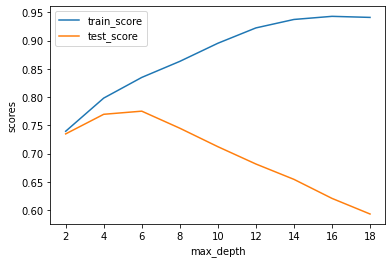

In [260]:
plt.plot(scores['param_max_depth'], scores['mean_train_score'])
plt.plot(scores['param_max_depth'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.show()

In [261]:
# Lets tune n_estimators

n_fold = 5
parameters = {'n_estimators': [10, 50, 100,200,300,400,1000]} 

rf = RandomForestClassifier(random_state=100, class_weight='balanced_subsample', max_depth=4)

grid = GridSearchCV(rf, param_grid=parameters, cv=n_fold, 
                    verbose=1, return_train_score=True, scoring='recall',n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   56.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
    

In [262]:
print("Best Recall: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best Recall:  0.7751956380542167
Best hyperparameters:  {'n_estimators': 1000}


In [263]:
scores = grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.384961,0.055841,0.009576,0.000489,10,{'n_estimators': 10},0.771930,0.764411,0.802005,0.776382,0.733668,0.769680,0.021996,7,0.787955,0.804266,0.792346,0.803762,0.803135,0.798293,0.006801
1,1.480932,0.050278,0.029818,0.007825,50,{'n_estimators': 50},0.779449,0.759398,0.817043,0.773869,0.741206,0.774194,0.025182,2,0.797365,0.798620,0.786073,0.801254,0.808150,0.798292,0.007159
2,2.990810,0.118937,0.046865,0.000002,100,{'n_estimators': 100},0.781955,0.751880,0.817043,0.766332,0.746231,0.772689,0.025403,6,0.791719,0.797365,0.781681,0.798746,0.799373,0.793777,0.006625
3,5.823976,0.129659,0.093727,0.000002,200,{'n_estimators': 200},0.781955,0.749373,0.814536,0.773869,0.743719,0.772691,0.025382,5,0.787955,0.797365,0.782309,0.799373,0.798119,0.793024,0.006718
4,10.007355,0.722978,0.180180,0.007067,300,{'n_estimators': 300},0.779449,0.756892,0.817043,0.771357,0.741206,0.773190,0.025511,4,0.790464,0.796110,0.782309,0.798119,0.796865,0.792774,0.005853


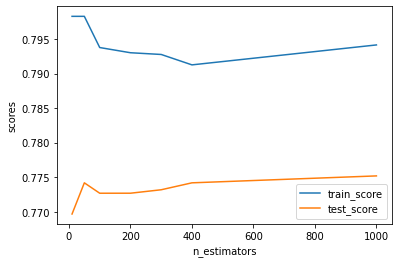

In [264]:
plt.plot(scores['param_n_estimators'], scores['mean_train_score'])
plt.plot(scores['param_n_estimators'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.show()

In [265]:
# Lets tune max_features

n_fold = 5
parameters = {'max_features': range(5,52,5)}

rf = RandomForestClassifier(random_state=100, class_weight='balanced_subsample', max_depth=4)

grid = GridSearchCV(rf, param_grid=parameters, cv=n_fold, 
                    verbose=1, return_train_score=True, scoring='recall',n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
    

In [266]:
print("Best Recall: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best Recall:  0.8053070484298805
Best hyperparameters:  {'max_features': 50}


In [267]:
scores = grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.321537,0.047172,0.013762,0.005548,5,{'max_features': 5},0.769424,0.741855,0.817043,0.778894,0.753769,0.772196,0.025784,10,0.782309,0.779799,0.797365,0.791223,0.793730,0.788885,0.006733
1,0.464903,0.047793,0.008509,0.004973,10,{'max_features': 10},0.786967,0.761905,0.832080,0.788945,0.728643,0.779710,0.034073,9,0.803011,0.797992,0.804266,0.794984,0.794984,0.799048,0.003926
2,0.550434,0.018400,0.009372,0.007652,15,{'max_features': 15},0.771930,0.781955,0.834586,0.771357,0.771357,0.786237,0.024509,8,0.806148,0.808657,0.803011,0.814420,0.811912,0.808830,0.004045
3,0.655205,0.011122,0.009372,0.007652,20,{'max_features': 20},0.796992,0.769424,0.849624,0.786432,0.771357,0.794766,0.029237,6,0.803639,0.811794,0.804266,0.818182,0.824451,0.812466,0.008024
4,0.809750,0.008065,0.009705,0.005861,25,{'max_features': 25},0.771930,0.789474,0.842105,0.798995,0.768844,0.794269,0.026378,7,0.809285,0.829360,0.806148,0.838245,0.827586,0.822125,0.012346


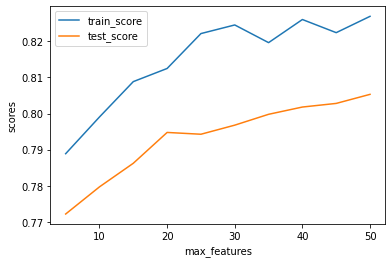

In [268]:
plt.plot(scores['param_max_features'], scores['mean_train_score'])
plt.plot(scores['param_max_features'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('max_features')
plt.ylabel('scores')
plt.show()

In [269]:
# Lets tune min_samples_leaf

n_fold = 5
parameters = {'min_samples_leaf': range(100,1000,50)}  

rf = RandomForestClassifier(random_state=100, class_weight='balanced_subsample', max_depth=4)

grid = GridSearchCV(rf, param_grid=parameters, cv=n_fold, 
                    verbose=1, return_train_score=True, scoring='recall',n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
    

In [270]:
print("Best Recall: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best Recall:  0.7882508301742631
Best hyperparameters:  {'min_samples_leaf': 300}


In [271]:
scores = grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.376588,0.040595,0.014960,0.006938,100,{'min_samples_leaf': 100},0.789474,0.764411,0.807018,0.786432,0.733668,0.776202,0.025212,6,0.803011,0.812422,0.789210,0.784326,0.793103,0.796414,0.010087
1,0.359046,0.036950,0.014228,0.003313,150,{'min_samples_leaf': 150},0.761905,0.751880,0.807018,0.783920,0.753769,0.771697,0.021009,9,0.784818,0.786700,0.786073,0.783699,0.798746,0.788007,0.005468
2,0.315425,0.008654,0.012498,0.006249,200,{'min_samples_leaf': 200},0.766917,0.766917,0.832080,0.788945,0.753769,0.781725,0.027596,4,0.789210,0.798620,0.795483,0.793730,0.800000,0.795409,0.003812
3,0.299410,0.006585,0.009374,0.007654,250,{'min_samples_leaf': 250},0.764411,0.759398,0.832080,0.804020,0.758794,0.783739,0.029450,3,0.787327,0.787955,0.788582,0.808150,0.810658,0.796535,0.010545
4,0.301873,0.006482,0.009373,0.007653,300,{'min_samples_leaf': 300},0.776942,0.784461,0.819549,0.793970,0.766332,0.788251,0.018082,1,0.799247,0.808030,0.800502,0.800000,0.810031,0.803562,0.004527


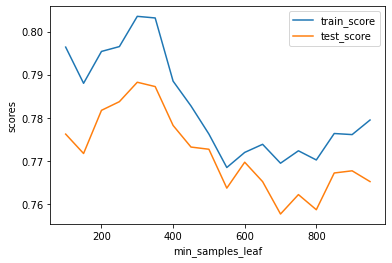

In [272]:
plt.plot(scores['param_min_samples_leaf'], scores['mean_train_score'])
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('scores')
plt.show()

In [273]:
# Lets tune min_samples_split

n_fold = 5
parameters = {'min_samples_split': range(50, 2000, 50)} 

rf = RandomForestClassifier(random_state=100, class_weight='balanced_subsample', max_depth=4)

grid = GridSearchCV(rf, param_grid=parameters, cv=n_fold, 
                    verbose=1, return_train_score=True, scoring='recall',n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:    9.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
    

In [274]:
print("Best Recall: ", grid.best_score_)
print("Best hyperparameters: ", grid.best_params_)

Best Recall:  0.7872423862959623
Best hyperparameters:  {'min_samples_split': 1800}


In [275]:
scores = grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.367860,0.070147,0.016158,0.010488,50,{'min_samples_split': 50},0.779449,0.764411,0.812030,0.776382,0.726131,0.771682,0.027705,36,0.789210,0.794856,0.790464,0.808150,0.803762,0.797288,0.007452
1,0.375265,0.049152,0.008956,0.006761,100,{'min_samples_split': 100},0.779449,0.769424,0.809524,0.788945,0.736181,0.776705,0.024204,22,0.790464,0.802384,0.793601,0.798119,0.810658,0.799045,0.007073
2,0.335439,0.006339,0.006249,0.007653,150,{'min_samples_split': 150},0.766917,0.766917,0.814536,0.783920,0.731156,0.772690,0.027087,34,0.783563,0.804893,0.791719,0.779937,0.795611,0.791145,0.008859
3,0.319158,0.008280,0.006249,0.007653,200,{'min_samples_split': 200},0.784461,0.761905,0.812030,0.781407,0.728643,0.773691,0.027616,30,0.792346,0.795483,0.794856,0.778683,0.796865,0.791647,0.006645
4,0.314330,0.003805,0.003124,0.006248,250,{'min_samples_split': 250},0.769424,0.761905,0.796992,0.783920,0.736181,0.769685,0.020645,38,0.785445,0.789837,0.789837,0.776176,0.793103,0.786880,0.005880


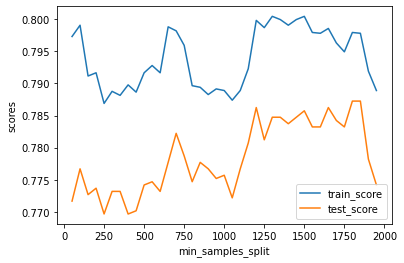

In [276]:
plt.plot(scores['param_min_samples_split'], scores['mean_train_score'])
plt.plot(scores['param_min_samples_split'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('min_samples_split')
plt.ylabel('scores')
plt.show()

In [277]:
# Now lets create the param_grid based on the results we got so far

param_grid = {
    'max_depth': 6,
    'n_estimators':1000,
    'max_features':50,
    'min_samples_leaf':300,
    'min_samples_split':1800
}

# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=param_grid['max_depth'],
                             min_samples_leaf=param_grid['min_samples_leaf'], 
                             min_samples_split=param_grid['min_samples_split'],
                             max_features=param_grid['max_features'],
                             n_estimators=param_grid['n_estimators'],
                             n_jobs=-1,
                             verbose=0,
                             random_state=100,
                             class_weight='balanced_subsample')

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=6, max_features=50,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=300,
                       min_samples_split=1800, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=100, verbose=0, warm_start=False)

In [278]:
y_train_pred = rfc.predict(X_train)
random_forest_score_train = accuracy_score(y_train, y_train_pred)
random_forest_score_train

0.8552380952380952

In [279]:
y_test_pred = rfc.predict(X_test)
random_forest_score_test = accuracy_score(y_test, y_test_pred)
random_forest_score_test

0.849127874680591

In [280]:
# lets now look at the confusion matrix
cm3 = confusion_matrix(y_test, y_test_pred)
cm3

array([[6952, 1195],
       [ 163,  691]], dtype=int64)

In [281]:
TP = cm3[1,1] # true positive 
TN = cm3[0,0] # true negatives
FP = cm3[0,1] # false positives
FN = cm3[1,0]

In [282]:
# Let's see the sensitivity
TP / float(TP+FN)

0.8091334894613583

In [283]:
# Let us calculate specificity
TN / float(TN+FP)

0.8533202405793544

In [284]:
# Lets look at the ROCAUC score
pred_probs_test = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.911921142220136

### So, we have achieved a good model with Sensitivity = 80.9% and AUC Score = 91.1%

In [285]:
# Random Forest model parameters
model_parameters = list(rfc.feature_importances_.reshape(51,1))
model_parameters = [val for params in model_parameters for val in params]
model_parameters = [round(param, 3) for param in model_parameters]
model_parameters = [x for x in model_parameters]
cols = X_train.columns
sorted(list(zip(cols, model_parameters)), key=lambda x: abs(x[1]), reverse=True)

[('loc_ic_mou_8', 0.774),
 ('roam_og_mou_8', 0.117),
 ('total_rech_amt_diff', 0.049),
 ('loc_og_mou_8', 0.017),
 ('total_rech_amt_8', 0.01),
 ('total_rech_num_diff', 0.009),
 ('loc_ic_diff', 0.006),
 ('std_og_diff', 0.006),
 ('roam_ic_mou_8', 0.002),
 ('total_rech_amt_data_8', 0.002),
 ('vol_data_3g_diff', 0.002),
 ('roam_og_diff', 0.002),
 ('isd_og_mou_8', 0.001),
 ('loc_og_diff', 0.001),
 ('std_og_mou_8', 0.0),
 ('spl_og_mou_8', 0.0),
 ('og_others_8', 0.0),
 ('std_ic_mou_8', 0.0),
 ('spl_ic_mou_8', 0.0),
 ('isd_ic_mou_8', 0.0),
 ('ic_others_8', 0.0),
 ('total_rech_num_8', 0.0),
 ('max_rech_amt_8', 0.0),
 ('vol_2g_mb_8', 0.0),
 ('monthly_2g_6', 0.0),
 ('monthly_2g_7', 0.0),
 ('monthly_2g_8', 0.0),
 ('sachet_2g_6', 0.0),
 ('sachet_2g_8', 0.0),
 ('monthly_3g_6', 0.0),
 ('monthly_3g_8', 0.0),
 ('sachet_3g_6', 0.0),
 ('sachet_3g_8', 0.0),
 ('aug_vbc_3g', 0.0),
 ('aon_bucket', 0.0),
 ('total_rech_amt_data_avg', 0.0),
 ('vol_data_3g_avg', 0.0),
 ('og_others_avg', 0.0),
 ('roam_ic_avg', 0.0)

<hr>

## XGBoost on the original dataset

In [286]:
# We are using scla_pos_weight to handle class imbalance
xgb_classifier = XGBClassifier(random_state=100, scale_pos_weight=15)

In [287]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=15, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [288]:
y_train_pred = xgb_classifier.predict(X_train)
xgboost_train_score = accuracy_score(y_train, y_train_pred)
xgboost_train_score

0.9753333333333334

In [289]:
y_test_pred = xgb_classifier.predict(X_test)
xgboost_test_score = accuracy_score(y_test, y_test_pred)
xgboost_test_score

0.9141206532607488

In [290]:
# lets now look at the confusion matrix
cm4 = confusion_matrix(y_test, y_test_pred)
cm4

array([[7643,  504],
       [ 269,  585]], dtype=int64)

In [291]:
TP = cm4[1,1] # true positive 
TN = cm4[0,0] # true negatives
FP = cm4[0,1] # false positives
FN = cm4[1,0]

In [292]:
# Let's see the sensitivity of our XGBoost model
TP / float(TP+FN)

0.6850117096018735

In [293]:
# Let us calculate specificity
TN / float(TN+FP)

0.9381367374493679

In [294]:
# Lets look at the ROCAUC score
pred_probs_test = xgb_classifier.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.9064293288804172

#### The vanilla XGBoost works decently. Let tune the parameters now

In [295]:
# Lets tune min_child_weight
xgb_classifier = XGBClassifier(random_state=100, n_estimators=100, scale_pos_weight=15)
folds=5
param_grid = {'min_child_weight': [5, 10, 20, 50, 75, 100] }

cv = GridSearchCV(xgb_classifier, param_grid=param_grid,scoring='recall', 
                  cv=folds, n_jobs=-1,verbose=1, return_train_score=True)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=15,
                                     subsample=N

In [296]:
print("Best Recall: ", cv.best_score_)
print("Best hyperparameters: ", cv.best_params_)

Best Recall:  0.81332996285881
Best hyperparameters:  {'min_child_weight': 100}


In [297]:
scores = cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.768508,0.244067,0.059359,0.011688,5,{'min_child_weight': 5},0.729323,0.729323,0.744361,0.716080,0.690955,0.722011,0.017922,6,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.000000
1,17.180603,1.030566,0.059362,0.006249,10,{'min_child_weight': 10},0.736842,0.731830,0.769424,0.731156,0.701005,0.734053,0.021744,5,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.000000
2,18.367704,0.226504,0.059361,0.006248,20,{'min_child_weight': 20},0.746867,0.761905,0.771930,0.753769,0.723618,0.751619,0.016306,4,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.000000
3,17.743359,0.121160,0.065609,0.006248,50,{'min_child_weight': 50},0.812030,0.786967,0.812030,0.783920,0.766332,0.792258,0.017615,3,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.000000
4,16.499248,1.658729,0.056237,0.007653,75,{'min_child_weight': 75},0.819549,0.789474,0.839599,0.781407,0.773869,0.800782,0.024845,2,1.0,0.999373,1.0,1.0,0.999373,0.999749,0.000307


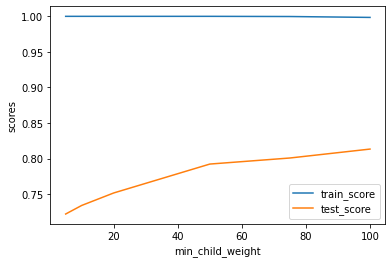

In [298]:
plt.plot(scores['param_min_child_weight'], scores['mean_train_score'])
plt.plot(scores['param_min_child_weight'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('min_child_weight')
plt.ylabel('scores')
plt.show()

In [299]:
# Lets tune colsample_bytree
xgb_classifier = XGBClassifier(random_state=100, n_estimators=100, scale_pos_weight=15)
folds=5
param_grid = {'colsample_bytree': [0.4,0.5, 0.6, 0.8, 1.0] }

cv = GridSearchCV(xgb_classifier, param_grid=param_grid,scoring='recall', 
                  cv=folds, n_jobs=-1,verbose=1, return_train_score=True)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   43.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=15,
                                     subsample=N

In [300]:
print("Best Recall: ", cv.best_score_)
print("Best hyperparameters: ", cv.best_params_)

Best Recall:  0.7185035494934993
Best hyperparameters:  {'colsample_bytree': 0.4}


In [301]:
scores = cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.251833,0.158497,0.062485,1.867595e-06,0.4,{'colsample_bytree': 0.4},0.724311,0.714286,0.741855,0.718593,0.693467,0.718504,0.015643,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,9.671416,0.639334,0.062484,8.844012e-07,0.5,{'colsample_bytree': 0.5},0.689223,0.696742,0.704261,0.706030,0.693467,0.697944,0.006369,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,12.106529,0.134016,0.059361,6.249666e-03,0.6,{'colsample_bytree': 0.6},0.731830,0.689223,0.739348,0.718593,0.655779,0.706957,0.030778,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,15.552595,0.214780,0.053111,7.653663e-03,0.8,{'colsample_bytree': 0.8},0.709273,0.704261,0.729323,0.688442,0.673367,0.700936,0.018986,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,15.407103,2.999034,0.043740,1.168931e-02,1,{'colsample_bytree': 1.0},0.711779,0.696742,0.726817,0.680905,0.658291,0.694910,0.023844,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0


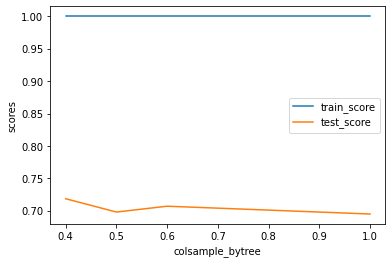

In [302]:
plt.plot(scores['param_colsample_bytree'], scores['mean_train_score'])
plt.plot(scores['param_colsample_bytree'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('colsample_bytree')
plt.ylabel('scores')
plt.show()

In [303]:
# Lets tune max_depth
xgb_classifier = XGBClassifier(random_state=100, n_estimators=100, scale_pos_weight=15)
folds=5
param_grid = {'max_depth': [3, 4, 5, 6] }

cv = GridSearchCV(xgb_classifier, param_grid=param_grid,scoring='recall', 
                  cv=folds, n_jobs=-1,verbose=1, return_train_score=True)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   36.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, s

In [304]:
print("Best Recall: ", cv.best_score_)
print("Best hyperparameters: ", cv.best_params_)

Best Recall:  0.8379136070014711
Best hyperparameters:  {'max_depth': 3}


In [305]:
scores = cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.384908,0.248582,0.037491,0.007654,3,{'max_depth': 3},0.857143,0.847118,0.854637,0.826633,0.804020,0.837914,0.020050,1,0.976788,0.972396,0.974906,0.975549,0.976803,0.975288,0.001620
1,12.039179,0.805043,0.053114,0.015931,4,{'max_depth': 4},0.807018,0.809524,0.837093,0.766332,0.763819,0.796761,0.027948,2,0.996863,0.993099,0.995609,0.996238,0.997492,0.995860,0.001517
2,16.114962,0.260009,0.049989,0.006249,5,{'max_depth': 5},0.771930,0.751880,0.774436,0.746231,0.703518,0.749602,0.025515,3,0.998745,0.999373,0.999373,1.000000,0.999373,0.999373,0.000397
3,13.615550,2.559679,0.037491,0.007654,6,{'max_depth': 6},0.711779,0.696742,0.726817,0.680905,0.658291,0.694910,0.023844,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


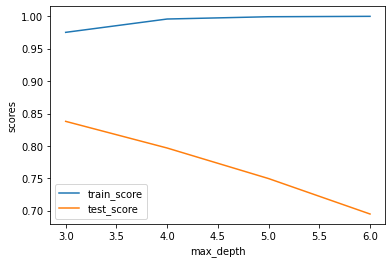

In [306]:
plt.plot(scores['param_max_depth'], scores['mean_train_score'])
plt.plot(scores['param_max_depth'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.show()

In [307]:
# Lets tune learning_rate
xgb_classifier = XGBClassifier(random_state=100, n_estimators=100, scale_pos_weight=15)
folds=5
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.9] }

cv = GridSearchCV(xgb_classifier, param_grid=param_grid,scoring='recall', 
                  cv=folds, n_jobs=-1,verbose=1, return_train_score=True)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=100, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=15,
                                     subsample=N

In [308]:
print("Best Recall: ", cv.best_score_)
print("Best hyperparameters: ", cv.best_params_)

Best Recall:  0.8459572345556401
Best hyperparameters:  {'learning_rate': 0.001}


In [309]:
scores = cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,19.769799,0.727446,0.046865,0.000002,0.001,{'learning_rate': 0.001},0.857143,0.839599,0.849624,0.849246,0.834171,0.845957,0.008108,1,0.922836,0.918444,0.902760,0.921630,0.904702,0.914074,0.008588
1,20.246142,0.555665,0.049989,0.006249,0.01,{'learning_rate': 0.01},0.844612,0.832080,0.852130,0.826633,0.816583,0.834409,0.012663,2,0.929109,0.932246,0.927854,0.929154,0.927900,0.929253,0.001598
2,19.692247,0.221493,0.065609,0.006249,0.1,{'learning_rate': 0.1},0.789474,0.799499,0.832080,0.776382,0.763819,0.792253,0.023266,3,0.994354,0.993726,0.991217,0.996238,0.994357,0.993979,0.001617
3,19.033026,0.160101,0.065610,0.006248,0.5,{'learning_rate': 0.5},0.656642,0.646617,0.674185,0.643216,0.608040,0.645742,0.021708,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,16.582674,4.413111,0.046860,0.009890,0.9,{'learning_rate': 0.9},0.634085,0.604010,0.659148,0.623116,0.575377,0.619149,0.028226,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


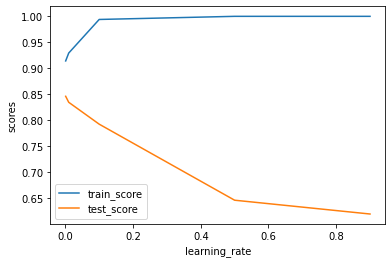

In [310]:
plt.plot(scores['param_learning_rate'], scores['mean_train_score'])
plt.plot(scores['param_learning_rate'], scores['mean_test_score'])
plt.legend(['train_score', 'test_score'])
plt.xlabel('learning_rate')
plt.ylabel('scores')
plt.show()

In [311]:
# Lets now apply the paramters obtained above
xgb_classifier = XGBClassifier(random_state=100, n_estimators=100, scale_pos_weight=15, colsample_bytree=0.3,
                              learning_rate=0.001, max_depth=3, min_child_weight=100)

In [312]:
xgb_classifier.fit(X_train, y_train)
y_train_pred = xgb_classifier.predict(X_train)
xgboost_train_score = accuracy_score(y_train, y_train_pred)
xgboost_train_score

0.821952380952381

In [313]:
y_test_pred = xgb_classifier.predict(X_test)
xgboost_test_score = accuracy_score(y_test, y_test_pred)
xgboost_test_score

0.8155760471058772

In [314]:
# lets now look at the confusion matrix
cm4 = confusion_matrix(y_test, y_test_pred)
cm4

array([[6601, 1546],
       [ 114,  740]], dtype=int64)

In [315]:
TP = cm4[1,1] # true positive 
TN = cm4[0,0] # true negatives
FP = cm4[0,1] # false positives
FN = cm4[1,0]

In [316]:
# Let's see the sensitivity of our XGBoost model
TP / float(TP+FN)

0.8665105386416861

In [317]:
# Let us calculate specificity
TN / float(TN+FP)

0.810236897017307

In [318]:
# Lets look at the ROCAUC score
pred_probs_test = xgb_classifier.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred_probs_test)

0.9169553942788382

### Looks like we have a good interpretable model with Sensitivity of 86.7% and AUC score of 91.7%. We will use this model to identify the important factors behind churn
### We can tune this model further to push up the sensitivity further but that may cause lots of false positives and we may lose interpretability. This model strikes a balance between sensitivity and specificity

In [319]:
# XGBoost model parameters
model_parameters = list(xgb_classifier.feature_importances_.reshape(51,1))
model_parameters = [val for params in model_parameters for val in params]
model_parameters = [round(param, 3) for param in model_parameters]
model_parameters = [x for x in model_parameters]
cols = X_train.columns
sorted(list(zip(cols, model_parameters)), key=lambda x: abs(x[1]), reverse=True)

[('std_ic_mou_8', 0.15),
 ('loc_ic_mou_8', 0.101),
 ('loc_og_mou_8', 0.098),
 ('total_rech_amt_8', 0.062),
 ('std_og_mou_8', 0.058),
 ('roam_og_mou_8', 0.052),
 ('total_rech_amt_diff', 0.043),
 ('roam_og_diff', 0.042),
 ('loc_ic_diff', 0.037),
 ('roam_ic_mou_8', 0.036),
 ('loc_og_diff', 0.03),
 ('max_rech_amt_8', 0.026),
 ('std_og_diff', 0.025),
 ('spl_og_mou_8', 0.024),
 ('roam_ic_diff', 0.021),
 ('monthly_3g_6', 0.019),
 ('max_rech_amt_diff', 0.018),
 ('vol_2g_mb_8', 0.017),
 ('std_ic_diff', 0.017),
 ('total_rech_num_diff', 0.016),
 ('total_rech_num_8', 0.015),
 ('spl_og_diff', 0.015),
 ('ic_others_8', 0.012),
 ('roam_ic_avg', 0.011),
 ('spl_og_avg', 0.011),
 ('aon_bucket', 0.009),
 ('sachet_2g_8', 0.008),
 ('total_rech_amt_data_8', 0.008),
 ('roam_og_avg', 0.007),
 ('vol_data_3g_diff', 0.004),
 ('isd_ic_mou_8', 0.003),
 ('total_rech_amt_data_avg', 0.003),
 ('aug_vbc_3g', 0.002),
 ('vol_data_2g_diff', 0.002),
 ('vbc_diff', 0.001),
 ('isd_og_mou_8', 0.0),
 ('og_others_8', 0.0),
 ('spl

In [321]:
# Plotting the feature importance
from xgboost import plot_importance

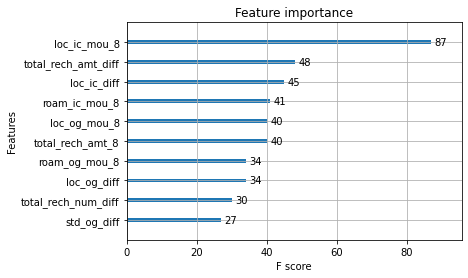

In [322]:
plot_importance(xgb_classifier, max_num_features=10)
plt.show()

### Here are the possible strategies to tackle customer churn:
- Keep an eye on the Local incoming and outgoing minutes of usage in the action month. They could be important indicators of churn
- Abrupt drop in total recharge amount in the action phase compared to the average in the happy phase is an important indication of churn
- Abrupt drop in local incoming and outgoing calls in the action phase compared to the average in the happy phase is in important indication of churn. This may indicate that the customer has already got a better deal somewhere else and is in the process of switching over
- Keep an eye on the roaming incoming and outgoing minutes of usage in the action month. These would be important indicators of churn
- If the total number of recharge drops significantly in the action month compared to the happy months, that might be an indicator of churn
- Keep an eye on the STD usage drop in the action month